In [575]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [576]:
%reload_ext autoreload

In [577]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [578]:
import warnings
warnings.filterwarnings('ignore')

In [579]:
sys.path.append(os.path.abspath(os.path.join('../src')))

In [580]:
from preprocessing import PreProcess
from overview import Overview 
overview = Overview()
preProcess = PreProcess()
from plot import Plot
pl = Plot()

In [581]:
plt.style.use("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle")

In [582]:
df_preprocessed = pd.read_csv('../data/outlier_data.csv')

In [583]:
df_preprocessed.head()


bearer_id            start  start_ms              end  end_ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   dur._(ms)          imsi  msisdn/number          imei  \
0  14.416352  2.082014e+14   3.366496e+10  3.552121e+13   
1  14.126741  2.082019e+14   3.368185e+10  3.579401e+13   
2  14.124290  2.082003e+14   3.376063e+10  3.528151e+13   
3  14.094285  2.082014e+14   3.375034e+10  3.535661e+13   
4  13.900779  2.082014e+14   3.369980e+10  3.540701e+13   

      last_location_name  ...  total_ul_(bytes)  total_dl_(bytes)  \
0  9.16456699548519E+015  ...         17.419642         19.548462   
1                L77566A  ...         17.800791         20.297677   
2                D42335A  ...         17.143551         19.449612   
3                T21824A  ...         17.584222         20.556064   
4                D88865A  ...         17.467280         20.159635   

   social_media     google      email    youtube    netflix     gaming  \
0     14.266704  14.882258  15.124196  16.725464  16.697805  19.493724   
1     14.474728  15.300314  13.750849  17.488238  17.386888  20.228840   
2     14.361478  16.140749  15.028381  17.354300  16.983144  19.253504   
3     13.396189  16.284606  14.543534  17.413775  16.529714  20.513024   
4     13.724259  15.863054  14.562364  17.348387  16.679983  20.090719   

       other  total_data  
0  19.011567   19.660878  
1  20.110702   20.376803  
2  19.843568   19.544607  
3  20.451243   20.606005  
4  20.151663   20.225161  

[5 rows x 63 columns]

# User Overview Analysis

### Top 10 handsets used by the customers.

In [584]:
top10_handsets = df_preprocessed['handset_type'].value_counts().nlargest(10)

In [585]:
top10_handsets = pd.DataFrame({'handset_type':top10_handsets.index,'count':top10_handsets.values})

In [586]:
top10_handsets.head()

handset_type  count
0         Huawei B528S-23A  20324
1  Apple iPhone 6S (A1688)   9419
2   Apple iPhone 6 (A1586)   9023
3                undefined   8987
4   Apple iPhone 7 (A1778)   6326

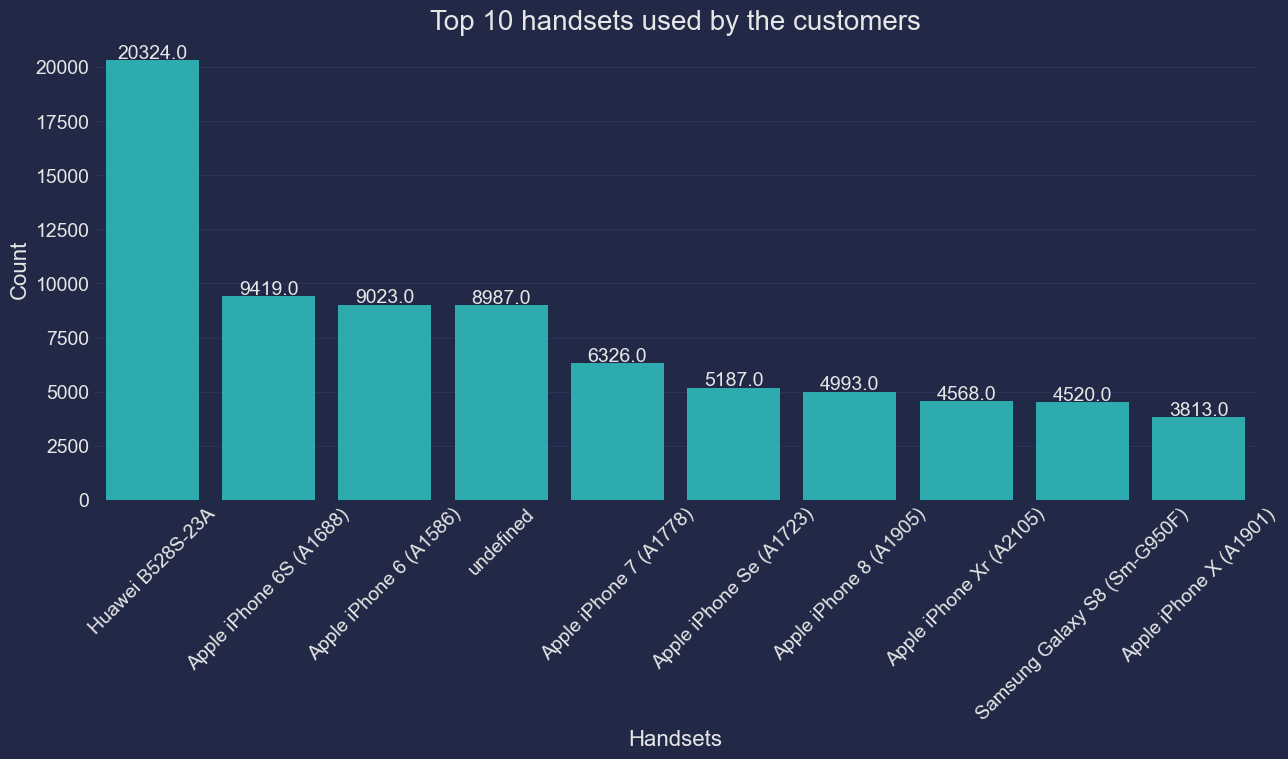

In [587]:
pl.barplot(top10_handsets, "handset_type", "count", 'Top 10 handsets used by the customers', 'Handsets', 'Count' )

## The top 3 handset manufacturers

In [588]:
top3_manufacturers = df_preprocessed['handset_manufacturer'].value_counts().nlargest(3)

In [589]:
top3_manufacturers = pd.DataFrame({'handset_manufacturer':top3_manufacturers.index,'count':top3_manufacturers.values})

In [590]:
top3_manufacturers

handset_manufacturer  count
0                Apple  60137
1              Samsung  40839
2               Huawei  34423

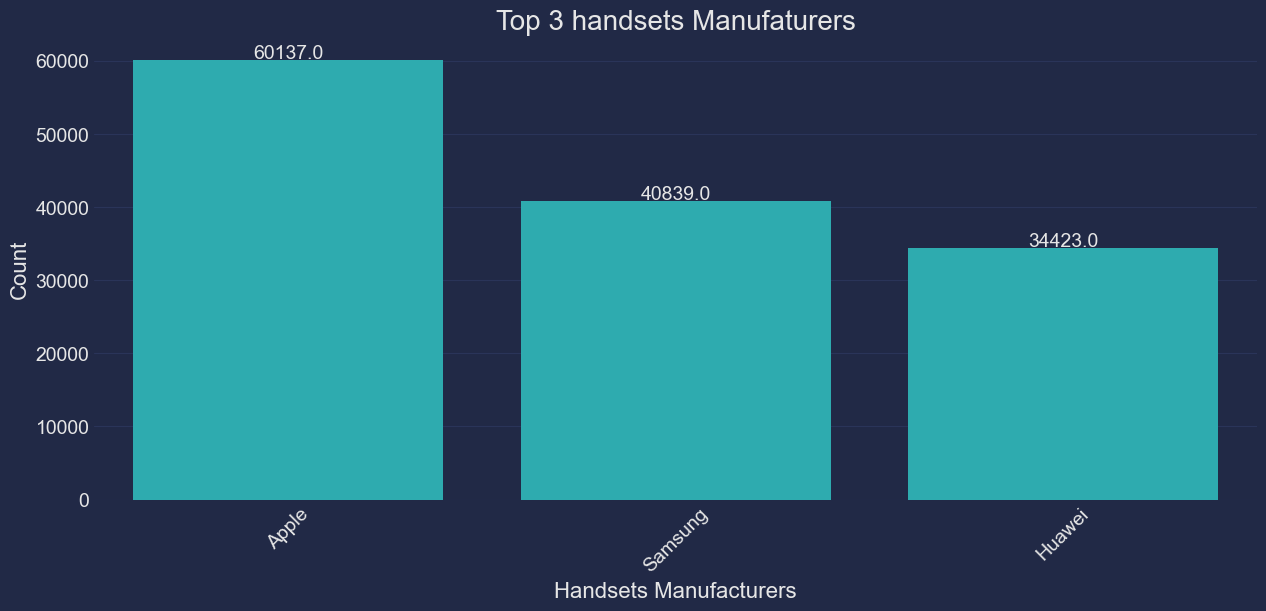

In [591]:
pl.barplot(top3_manufacturers, "handset_manufacturer", "count", 'Top 3 handsets Manufaturers', 'Handsets Manufacturers', 'Count' )

## The top 5 handsets per top 3 handset manufacturers

In [592]:
top5_per_manufacturer = {}
for manufacturer in top3_manufacturers['handset_manufacturer']:
    top5_per_manufacturer[manufacturer] = df_preprocessed.groupby('handset_manufacturer')['handset_type'].value_counts()[manufacturer].nlargest(5)

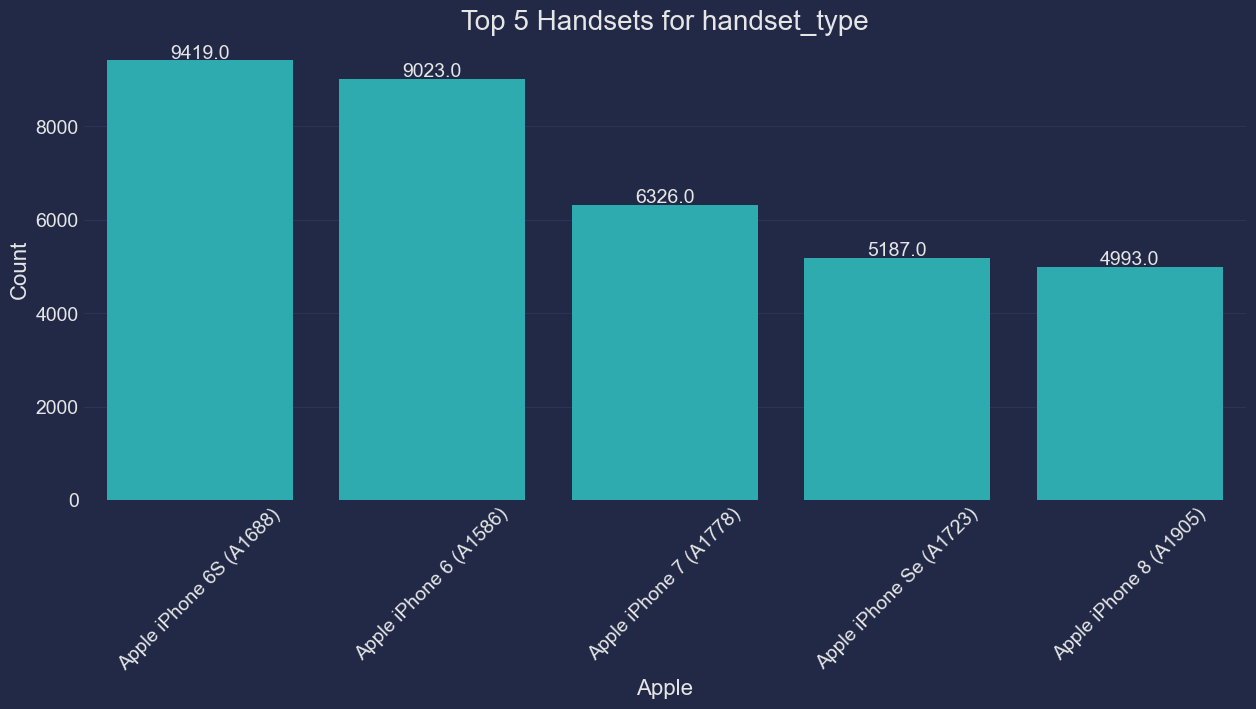

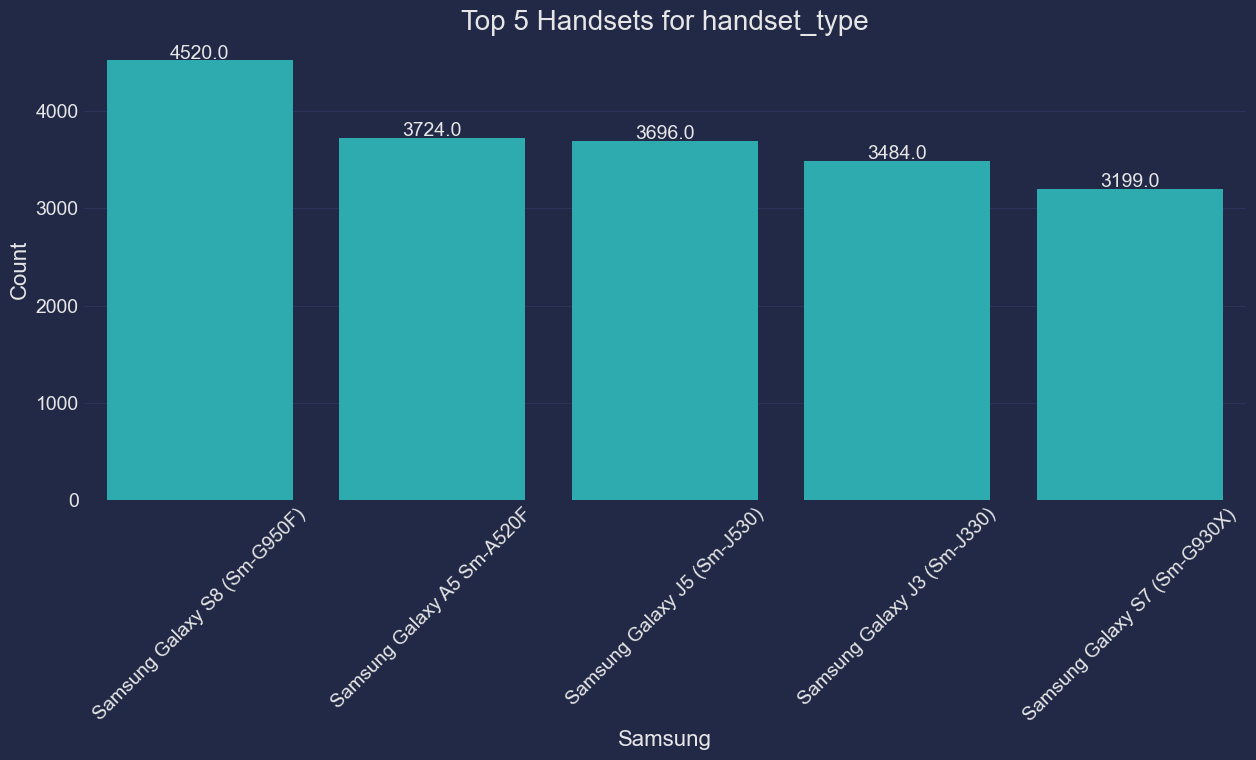

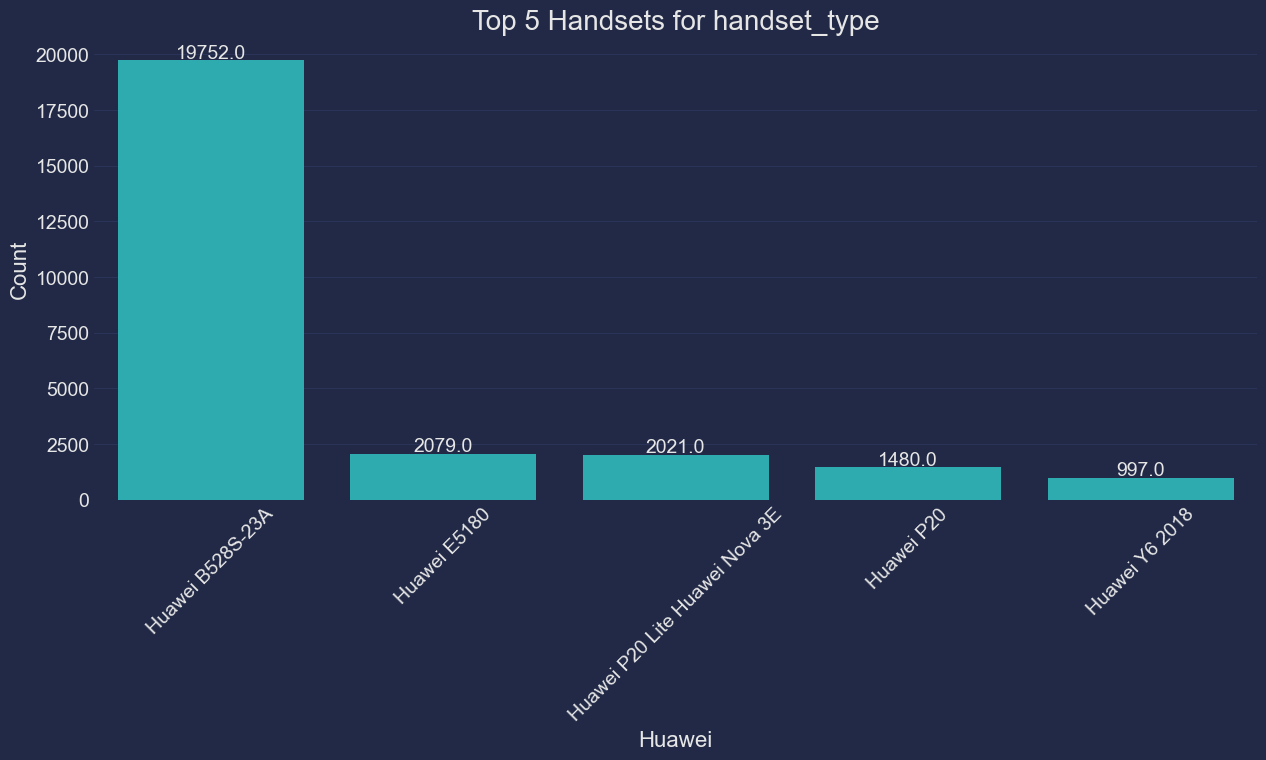

In [593]:
# Visualization of  top 5 handsets per top 3 handset manufacturers
for manufacturer, top_5 in top5_per_manufacturer.items():
    df = pd.DataFrame(top_5).reset_index()
    cols= list(df.columns)
    pl.barplot(df,cols[0], cols[1], f'Top 5 Handsets for {cols[0]}',manufacturer,'Count' )
    

### A short interpretation and recommendation to marketing teams

According to the analysis obtained, the following recommendations are suggested:

Given that a significant majority of users utilize devices manufactured by Apple, Samsung, and Huawei, it is advisable for the sales team to concentrate their efforts on engaging these specific product users.

The marketing team should highlight and promote the best-performing devices preferred by customers. Additionally, considering that Huawei's products hold a considerable number of positions among the top ten handsets, there is potential for cross-promotion with Huawei. Similarly, Samsung and Apple should also be considered for cross-promotional activities due to their market presence and popularity among users.

#### Aggregation per user

##### Number of data sessions

In [594]:
sessions =df_preprocessed.groupby('msisdn/number')['bearer_id'].count().nlargest(10)
sessions

msisdn/number
3.362632e+10    18
3.361489e+10    17
3.362578e+10    17
3.365973e+10    16
3.367588e+10    15
3.376054e+10    15
3.366716e+10    13
3.360313e+10    12
3.360452e+10    12
3.362708e+10    12
Name: bearer_id, dtype: int64

#### Session duration

In [595]:
df_preprocessed.groupby('msisdn/number')['dur._(ms)'].sum().nlargest(10)

msisdn/number
3.362578e+10    233.413129
3.362632e+10    231.977427
3.361489e+10    222.446521
3.365973e+10    198.016024
3.376054e+10    195.767900
3.367588e+10    188.665113
3.366716e+10    172.629643
3.360313e+10    156.933829
3.360452e+10    154.378835
3.376041e+10    154.085482
Name: dur._(ms), dtype: float64

##### Total download (DL) 

In [596]:
#  total download (DL) 
df_preprocessed.groupby('msisdn/number')[['total_dl_(bytes)', 'total_ul_(bytes)']].sum().nlargest(10, 'total_dl_(bytes)')

total_dl_(bytes)  total_ul_(bytes)
msisdn/number                                    
3.362632e+10         354.469774        313.238174
3.361489e+10         336.610039        296.955644
3.362578e+10         336.420166        298.278567
3.365973e+10         313.799886        279.152641
3.367588e+10         297.810275        261.389693
3.376054e+10         297.518869        264.702722
3.366716e+10         254.286268        228.070512
3.376041e+10         239.418673        210.802513
3.362708e+10         236.605837        208.397906
3.378632e+10         236.044649        209.437584

#### Total upload (UL) data

In [597]:
#  total upload (UL) 
df_preprocessed.groupby('msisdn/number')[['total_dl_(bytes)','total_ul_(bytes)']].sum().nlargest(10, 'total_ul_(bytes)')

total_dl_(bytes)  total_ul_(bytes)
msisdn/number                                    
3.362632e+10         354.469774        313.238174
3.362578e+10         336.420166        298.278567
3.361489e+10         336.610039        296.955644
3.365973e+10         313.799886        279.152641
3.376054e+10         297.518869        264.702722
3.367588e+10         297.810275        261.389693
3.366716e+10         254.286268        228.070512
3.376041e+10         239.418673        210.802513
3.378632e+10         236.044649        209.437584
3.362708e+10         236.605837        208.397906

#### Total data volume (in Bytes) during this session for each application

In [598]:
df_preprocessed["social_media"] = df_preprocessed["social_media_dl_(bytes)"] + df_preprocessed['social_media_ul_(bytes)']
df_preprocessed["google"] = df_preprocessed["google_dl_(bytes)"] + df_preprocessed["google_ul_(bytes)"]
df_preprocessed['email'] = df_preprocessed["email_dl_(bytes)"] + df_preprocessed["email_ul_(bytes)"]
df_preprocessed['youtube'] = df_preprocessed["youtube_dl_(bytes)"] + df_preprocessed["youtube_ul_(bytes)"]
df_preprocessed['netflix'] = df_preprocessed["netflix_dl_(bytes)"] + df_preprocessed["netflix_ul_(bytes)"]
df_preprocessed["gaming"] = df_preprocessed["gaming_dl_(bytes)"] + df_preprocessed["gaming_ul_(bytes)"]
df_preprocessed['other'] = df_preprocessed["other_dl_(bytes)"]+df_preprocessed["other_ul_(bytes)"]
df_preprocessed['total_data'] = df_preprocessed['total_dl_(bytes)'] + df_preprocessed['total_ul_(bytes)']

In [599]:
user_data = df_preprocessed.groupby('msisdn/number')[['social_media', 'google', 'email', 'youtube', 'gaming', 'other', 'total_data']].sum().nlargest(20, 'total_data')

In [600]:
user_data = df_preprocessed.groupby('msisdn/number')[['social_media', 'google', 'email', 'youtube', 'gaming', 'other', 'total_data']].sum().sort_values('total_data', ascending=False)

In [601]:
user_data.head()

social_media      google       email     youtube      gaming  \
msisdn/number                                                                 
3.362632e+10     442.860677  529.610961  484.472238  569.925227  633.332525   
3.362578e+10     404.350462  501.135794  459.034413  552.886265  602.272621   
3.361489e+10     413.240394  496.900990  460.670162  545.945366  597.649557   
3.365973e+10     394.552274  462.958188  419.789755  502.131067  558.948230   
3.376054e+10     367.325727  445.742523  404.796363  481.097352  533.910237   

                    other  total_data  
msisdn/number                          
3.362632e+10   634.936095  667.707948  
3.362578e+10   601.204842  634.698734  
3.361489e+10   595.427778  633.565683  
3.365973e+10   559.612507  592.952528  
3.376054e+10   516.657601  562.221591

In [602]:
user_data.reset_index(inplace=True)

In [603]:
user_data

msisdn/number  social_media      google       email     youtube  \
0        3.362632e+10    442.860677  529.610961  484.472238  569.925227   
1        3.362578e+10    404.350462  501.135794  459.034413  552.886265   
2        3.361489e+10    413.240394  496.900990  460.670162  545.945366   
3        3.365973e+10    394.552274  462.958188  419.789755  502.131067   
4        3.376054e+10    367.325727  445.742523  404.796363  481.097352   
...               ...           ...         ...         ...         ...   
107895   3.378251e+10     24.880651   27.098129   26.148568   30.193376   
107896   3.365905e+10     24.828440   29.302375   24.747615   26.535342   
107897   3.366132e+10     22.379023   28.060179   27.672258   30.622477   
107898   3.366668e+10     23.068191   26.134920   27.562547   28.378386   
107899   3.365920e+10     24.810992   26.734706   23.680375   30.999963   

            gaming       other  total_data  
0       633.332525  634.936095  667.707948  
1       602.272621  601.204842  634.698734  
2       597.649557  595.427778  633.565683  
3       558.948230  559.612507  592.952528  
4       533.910237  516.657601  562.221591  
...            ...         ...         ...  
107895   31.188862   34.570229   33.338105  
107896   31.680656   30.992316   33.315335  
107897   30.633210   34.614478   33.207814  
107898   27.586635   34.414288   33.078097  
107899   30.153324   33.700341   33.019835  

[107900 rows x 8 columns]

In [604]:
user_data.corr()

msisdn/number  social_media    google     email   youtube  \
msisdn/number       1.000000     -0.001848 -0.001743 -0.001670 -0.001645   
social_media       -0.001848      1.000000  0.993931  0.993375  0.994217   
google             -0.001743      0.993931  1.000000  0.994540  0.995442   
email              -0.001670      0.993375  0.994540  1.000000  0.994840   
youtube            -0.001645      0.994217  0.995442  0.994840  1.000000   
gaming             -0.002029      0.994632  0.995810  0.995240  0.996133   
other              -0.001856      0.994585  0.995790  0.995229  0.996113   
total_data         -0.001991      0.995844  0.997108  0.996470  0.997669   

                 gaming     other  total_data  
msisdn/number -0.002029 -0.001856   -0.001991  
social_media   0.994632  0.994585    0.995844  
google         0.995810  0.995790    0.997108  
email          0.995240  0.995229    0.996470  
youtube        0.996133  0.996113    0.997669  
gaming         1.000000  0.996471    0.999140  
other          0.996471  1.000000    0.997885  
total_data     0.999140  0.997885    1.000000

#### Exploratory data analysis on those data

##### Non-Graphical Univariate Analysis

In [605]:
# Non-Graphical Univariate analysis for the categorical variables
num_cols = df_preprocessed.select_dtypes(include=np.number).columns
cat_cols = list(set(df_preprocessed.columns) - set(num_cols) - set(['start','end']))

Number of xDR sessions,  Session duration,  the total download (DL) and upload (UL) data , the total data volume (in Bytes) during this session for each application (Social Media, Google, Email, YouTube, Netflix, Gaming)

In [606]:
# Session aggregation of social_media per user
user_stat_per_app = df_preprocessed.groupby('msisdn/number').agg({'social_media': 'sum', 'google': 'sum', 'email': 'sum', 'youtube': 'sum', 'gaming': 'sum', 'other': 'sum'})


In [607]:
user_stat_per_app.head()

social_media     google      email    youtube     gaming  \
msisdn/number                                                             
3.360100e+10      24.758478  28.886711  26.748271  32.238131  34.642406   
3.360100e+10      25.805627  29.194096  27.934743  31.264510  34.974170   
3.360100e+10      25.733266  26.531873  28.258763  31.345269  36.180352   
3.360101e+10      22.704073  30.731634  26.165886  30.060477  34.707784   
3.360101e+10      48.636766  60.823188  53.460940  63.649461  70.313658   

                   other  
msisdn/number             
3.360100e+10   35.812062  
3.360100e+10   34.030799  
3.360100e+10   35.723909  
3.360101e+10   33.165518  
3.360101e+10   71.318676

In [608]:
user_stat_per_app.describe()

social_media         google          email        youtube  \
count  1.079000e+05  107900.000000  107900.000000  107900.000000   
mean           -inf      40.992835      37.310917      44.306637   
std             NaN      23.747411      21.632488      25.660715   
min            -inf      17.205016      14.959266      20.013901   
25%    2.393286e+01      29.230800      26.591099      31.633771   
50%    2.504772e+01      30.347840      27.703522      32.739533   
75%    4.575002e+01      56.303842      50.983663      60.991037   
max    4.428607e+02     529.610961     484.472238     569.925227   

              gaming          other  
count  107900.000000  107900.000000  
mean       48.901138      48.891841  
std        28.294053      28.292276  
min        23.295268      22.282535  
25%        34.929359      34.927788  
50%        36.045883      36.038713  
75%        67.685968      67.623930  
max       633.332525     634.936095

In [609]:
# Session aggregation of Durations apps per user
user_stat_per = df_preprocessed.groupby('msisdn/number').agg({'bearer_id': 'count', 'dur._(ms)': 'sum', 'total_ul_(bytes)': 'sum', 'total_dl_(bytes)': 'sum', 'total_data': 'sum'})

In [610]:
user_stat_per.head()

bearer_id  dur._(ms)  total_ul_(bytes)  total_dl_(bytes)  \
msisdn/number                                                             
3.360100e+10           1  11.667533         17.400504         20.552047   
3.360100e+10           1  12.107522         17.401927         18.609276   
3.360100e+10           1  11.812800         17.486909         20.137465   
3.360101e+10           1  10.817335         16.827486         19.811946   
3.360101e+10           2  19.656666         35.302955         40.640103   

               total_data  
msisdn/number              
3.360100e+10    37.952551  
3.360100e+10    36.011203  
3.360100e+10    37.624373  
3.360101e+10    36.639432  
3.360101e+10    75.943057

In [611]:
user_stat_per.describe()

bearer_id      dur._(ms)  total_ul_(bytes)  total_dl_(bytes)  \
count  107900.000000  107900.000000     107900.000000     107900.000000   
mean        1.390185      15.730767         24.313694         27.408933   
std         0.803344       9.401043         14.052408         15.855045   
min         1.000000       8.873748         14.868739         15.993335   
25%         1.000000      11.331290         17.409383         19.597558   
50%         1.000000      11.705111         17.661909         20.232060   
75%         2.000000      20.537997         34.417822         37.925431   
max        18.000000     233.413129        313.238174        354.469774   

          total_data  
count  107900.000000  
mean       51.722627  
std        29.893019  
min        33.019835  
25%        37.035707  
50%        37.716453  
75%        72.813748  
max       667.707948

In [612]:
# Handset_manufacturers distinct value
df_preprocessed.handset_manufacturer.value_counts()

handset_manufacturer
Apple                               60137
Samsung                             40839
Huawei                              34423
undefined                            8987
Sony Mobile Communications Ab         980
                                    ...  
Pt. Arga Mas Lestari                    1
Vastking Technology (Hk) Limited        1
Mobiwire Sas                            1
Option Nv                               1
M S Soha Enterprise                     1
Name: count, Length: 170, dtype: int64

There are 170 different handset manufacturers <br><br>
Apple, Samsung, & Huawei are the most popular manufacturers <br><br>
Apple         &emsp;&emsp;                    60137 <br>
Samsung       &emsp;&emsp;                    40839 <br>
Huawei        &emsp;&emsp;                    34423 <br>

In [613]:
# Last_location distinct values
df_preprocessed.last_location_name.value_counts()

last_location_name
D41377B                  1233
D17085A                    59
D72396C                    57
D73604C                    55
9.16456698599501E+015      55
                         ... 
G93294B                     1
D70721A                     1
G70820A                     1
T10340B                     1
K62027B                     1
Name: count, Length: 45547, dtype: int64

There are 45547 different locations used <br><br>
The location with ID D41377B is the most frequent

In [614]:
# Handset_type distinct values
df_preprocessed.handset_type.value_counts()

handset_type
Huawei B528S-23A              20324
Apple iPhone 6S (A1688)        9419
Apple iPhone 6 (A1586)         9023
undefined                      8987
Apple iPhone 7 (A1778)         6326
                              ...  
Nokia Lumia 925 Lumia 925         1
Nubia Technology. Z17 Mini        1
Lidaxin Technolo. My81            1
Nokia X                           1
Archos Sa Access 50 4G            1
Name: count, Length: 1396, dtype: int64

In [615]:
# Non-Graphical Univariate analysis for the Quantitative variables
df_preprocessed[num_cols].describe()

bearer_id       start_ms         end_ms      dur._(ms)  \
count  1.500010e+05  150001.000000  150001.000000  150001.000000   
mean   1.013803e+19     499.189512     498.799735      11.315590   
std    2.888632e+18     288.611320     288.097034       0.728958   
min    6.917538e+18       0.000000       0.000000       8.873748   
25%    7.349883e+18     250.000000     251.000000      10.958531   
50%    7.349883e+18     499.000000     500.000000      11.366731   
75%    1.304243e+19     749.000000     750.000000      11.793809   
max    1.318654e+19     999.000000     999.000000      14.435730   

               imsi  msisdn/number          imei  avg_rtt_dl_(ms)  \
count  1.500010e+05   1.500010e+05  1.500010e+05     1.500010e+05   
mean   2.082016e+14   4.182447e+10  4.846662e+13             -inf   
std    2.144732e+10   2.438731e+12  2.239542e+13              NaN   
min    2.040471e+14   3.360100e+10  4.400152e+11             -inf   
25%    2.082014e+14   3.365129e+10  3.546091e+13     3.465736e+00   
50%    2.082015e+14   3.366371e+10  3.572201e+13     3.784190e+00   
75%    2.082018e+14   3.368358e+10  8.611970e+13     4.219508e+00   
max    2.140743e+14   8.823971e+14  9.900120e+13     1.148167e+01   

       avg_rtt_ul_(ms)  avg_bearer_tp_dl_(kbps)  ...  total_ul_(bytes)  \
count     1.500010e+05             1.500010e+05  ...     150001.000000   
mean              -inf                     -inf  ...         17.489534   
std                NaN                      NaN  ...          0.304413   
min               -inf                     -inf  ...         14.868739   
25%       9.162907e-01             3.761200e+00  ...         17.318722   
50%       1.609438e+00             4.143135e+00  ...         17.532570   
75%       2.639057e+00             9.888881e+00  ...         17.708029   
max       8.870663e+00             1.284307e+01  ...         18.176458   

       total_dl_(bytes)  social_media         google          email  \
count     150001.000000  1.500010e+05  150001.000000  150001.000000   
mean          19.716028          -inf      29.487316      26.838807   
std            0.760144           NaN       1.416510       1.418453   
min           15.777581          -inf      17.176416      14.264497   
25%           19.309013  2.349552e+01      28.799901      26.148568   
50%           19.937654  2.451144e+01      29.810589      27.163319   
75%           20.316357  2.522916e+01      30.527193      27.879195   
max           20.621199  2.618574e+01      31.480719      28.840018   

             youtube        netflix         gaming          other  \
count  150001.000000  150001.000000  150001.000000  150001.000000   
mean       31.871028      31.866281      35.175984      35.169296   
std         1.417234       1.416597       1.415510       1.425800   
min        20.013901      18.633252      21.859962      22.282535   
25%        31.183683      31.172387      34.484128      34.480396   
50%        32.191424      32.184850      35.495082      35.496421   
75%        32.909780      32.909061      36.217814      36.212469   
max        33.865731      33.866037      37.171316      37.169507   

          total_data  
count  150001.000000  
mean       37.205562  
std         0.818044  
min        32.770283  
25%        36.747290  
50%        37.386446  
75%        37.823493  
max        38.730925  

[8 rows x 58 columns]

In [616]:
df_preprocessed['total_data'].describe()

count    150001.000000
mean         37.205562
std           0.818044
min          32.770283
25%          36.747290
50%          37.386446
75%          37.823493
max          38.730925
Name: total_data, dtype: float64

In [617]:
df_preprocessed['total_dl_(bytes)'].describe()

count    150001.000000
mean         19.716028
std           0.760144
min          15.777581
25%          19.309013
50%          19.937654
75%          20.316357
max          20.621199
Name: total_dl_(bytes), dtype: float64

Data Range

In [618]:
df_preprocessed['start'] = pd.to_datetime(df_preprocessed['start'], errors='coerce')
df_preprocessed['end'] = pd.to_datetime(df_preprocessed['end'], errors='coerce')

In [619]:
date_range = str(df_preprocessed['start'].dt.date.min()) + ' to ' +str(df_preprocessed['end'].dt.date.max())

In [620]:
date_range

'2019-04-04 to 2019-04-30'

### Univariate Graphical EDA

sns.swarmplot(x=df_preprocessed['total_dl_(bytes)'])

In [621]:
df_preprocessed

bearer_id               start  start_ms                 end  \
0       1.311448e+19 2019-04-04 12:01:00     770.0 2019-04-25 14:35:00   
1       1.311448e+19 2019-04-09 13:04:00     235.0 2019-04-25 08:15:00   
2       1.311448e+19 2019-04-09 17:42:00       1.0 2019-04-25 11:58:00   
3       1.311448e+19 2019-04-10 00:31:00     486.0 2019-04-25 07:36:00   
4       1.311448e+19 2019-04-12 20:10:00     565.0 2019-04-25 10:40:00   
...              ...                 ...       ...                 ...   
149996  7.277826e+18 2019-04-29 07:28:00     451.0 2019-04-30 06:02:00   
149997  7.349883e+18 2019-04-29 07:28:00     483.0 2019-04-30 10:41:00   
149998  1.311448e+19 2019-04-29 07:28:00     283.0 2019-04-30 10:46:00   
149999  1.311448e+19 2019-04-29 07:28:00     696.0 2019-04-30 10:40:00   
150000  1.311448e+19 2019-04-26 07:25:00     696.0 2019-04-25 00:01:00   

        end_ms  dur._(ms)          imsi  msisdn/number          imei  \
0        662.0  14.416352  2.082014e+14   3.366496e+10  3.552121e+13   
1        606.0  14.126741  2.082019e+14   3.368185e+10  3.579401e+13   
2        652.0  14.124290  2.082003e+14   3.376063e+10  3.528151e+13   
3        171.0  14.094285  2.082014e+14   3.375034e+10  3.535661e+13   
4        954.0  13.900779  2.082014e+14   3.369980e+10  3.540701e+13   
...        ...        ...           ...            ...           ...   
149996   214.0  11.305040  2.082022e+14   3.365069e+10  3.548311e+13   
149997   187.0  11.492417  2.082019e+14   3.366345e+10  3.566051e+13   
149998   810.0  11.495260  2.082017e+14   3.362189e+10  3.572121e+13   
149999   327.0  11.491804  2.082021e+14   3.361962e+10  8.618620e+13   
150000   327.0  11.491804  2.082021e+14   3.361962e+10  8.618620e+13   

           last_location_name  ...  total_ul_(bytes)  total_dl_(bytes)  \
0       9.16456699548519E+015  ...         17.419642         19.548462   
1                     L77566A  ...         17.800791         20.297677   
2                     D42335A  ...         17.143551         19.449612   
3                     T21824A  ...         17.584222         20.556064   
4                     D88865A  ...         17.467280         20.159635   
...                       ...  ...               ...               ...   
149996                D20434A  ...         17.869534         20.168445   
149997                D10223C  ...         17.482530         20.317774   
149998                T51102A  ...         17.368348         20.200345   
149999                L88342B  ...         17.204166         19.734125   
150000                D41377B  ...         17.204166         19.734125   

        social_media     google      email    youtube    netflix     gaming  \
0          24.354187  28.362490  26.919548  31.311305  32.002631  35.922280   
1          23.347978  28.798852  25.990915  33.589349  33.386505  34.200038   
2          24.987458  30.302333  28.224568  33.300760  32.316856  32.140017   
3          22.876560  30.856214  27.535407  33.411636  30.363133  36.699195   
4          24.491238  29.869166  26.542356  33.298699  29.592584  35.160804   
...              ...        ...        ...        ...        ...        ...   
149996     25.918963  30.966144  24.320555  32.880513  33.494420  36.116381   
149997     23.605224  29.214809  26.513169  32.376114  33.652106  35.626786   
149998     23.609891  29.985303  27.423405  31.370016  31.552498  36.542185   
149999     23.572987  30.335531  27.958466  31.924621  31.409802  34.424188   
150000     24.802787  30.101378  27.453575  32.483710  32.482393  35.790989   

            other  total_data  
0       34.953415   36.968104  
1       36.609760   38.098468  
2       35.087697   36.593162  
3       36.799046   38.140286  
4       36.574860   37.626915  
...           ...         ...  
149996  31.415888   38.037979  
149997  35.098602   37.800304  
149998  34.853750   37.568692  
149999  34.675267   36.938291  
150000  35.785898   36.938291  

[150001 rows x 63 columns]

In [622]:
df_preprocessed.head()

bearer_id               start  start_ms                 end  end_ms  \
0  1.311448e+19 2019-04-04 12:01:00     770.0 2019-04-25 14:35:00   662.0   
1  1.311448e+19 2019-04-09 13:04:00     235.0 2019-04-25 08:15:00   606.0   
2  1.311448e+19 2019-04-09 17:42:00       1.0 2019-04-25 11:58:00   652.0   
3  1.311448e+19 2019-04-10 00:31:00     486.0 2019-04-25 07:36:00   171.0   
4  1.311448e+19 2019-04-12 20:10:00     565.0 2019-04-25 10:40:00   954.0   

   dur._(ms)          imsi  msisdn/number          imei  \
0  14.416352  2.082014e+14   3.366496e+10  3.552121e+13   
1  14.126741  2.082019e+14   3.368185e+10  3.579401e+13   
2  14.124290  2.082003e+14   3.376063e+10  3.528151e+13   
3  14.094285  2.082014e+14   3.375034e+10  3.535661e+13   
4  13.900779  2.082014e+14   3.369980e+10  3.540701e+13   

      last_location_name  ...  total_ul_(bytes)  total_dl_(bytes)  \
0  9.16456699548519E+015  ...         17.419642         19.548462   
1                L77566A  ...         17.800791         20.297677   
2                D42335A  ...         17.143551         19.449612   
3                T21824A  ...         17.584222         20.556064   
4                D88865A  ...         17.467280         20.159635   

   social_media     google      email    youtube    netflix     gaming  \
0     24.354187  28.362490  26.919548  31.311305  32.002631  35.922280   
1     23.347978  28.798852  25.990915  33.589349  33.386505  34.200038   
2     24.987458  30.302333  28.224568  33.300760  32.316856  32.140017   
3     22.876560  30.856214  27.535407  33.411636  30.363133  36.699195   
4     24.491238  29.869166  26.542356  33.298699  29.592584  35.160804   

       other  total_data  
0  34.953415   36.968104  
1  36.609760   38.098468  
2  35.087697   36.593162  
3  36.799046   38.140286  
4  36.574860   37.626915  

[5 rows x 63 columns]

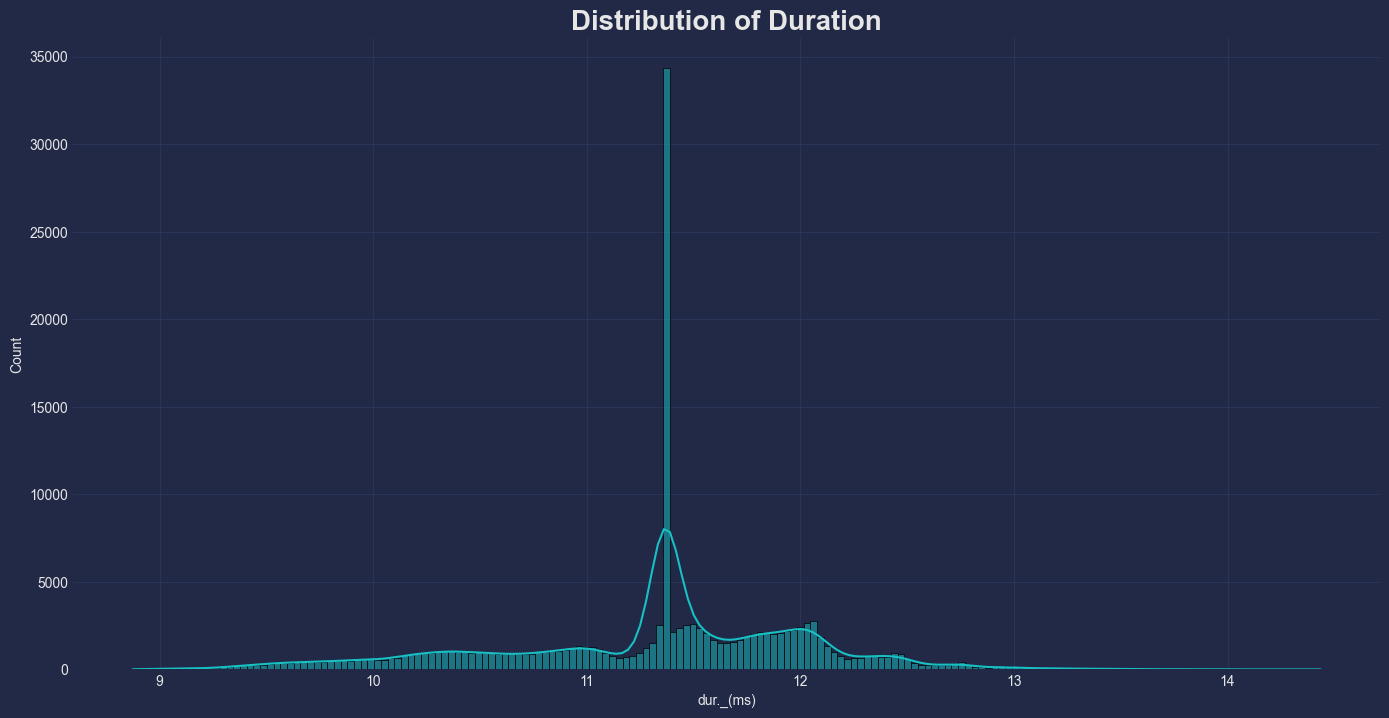

In [623]:
# Graphical Univariate analysis for duration
pl.distplot(df_preprocessed, df_preprocessed['dur._(ms)'],'Duration')


##### After data cleaning & preprocessing it now has a normal distribution

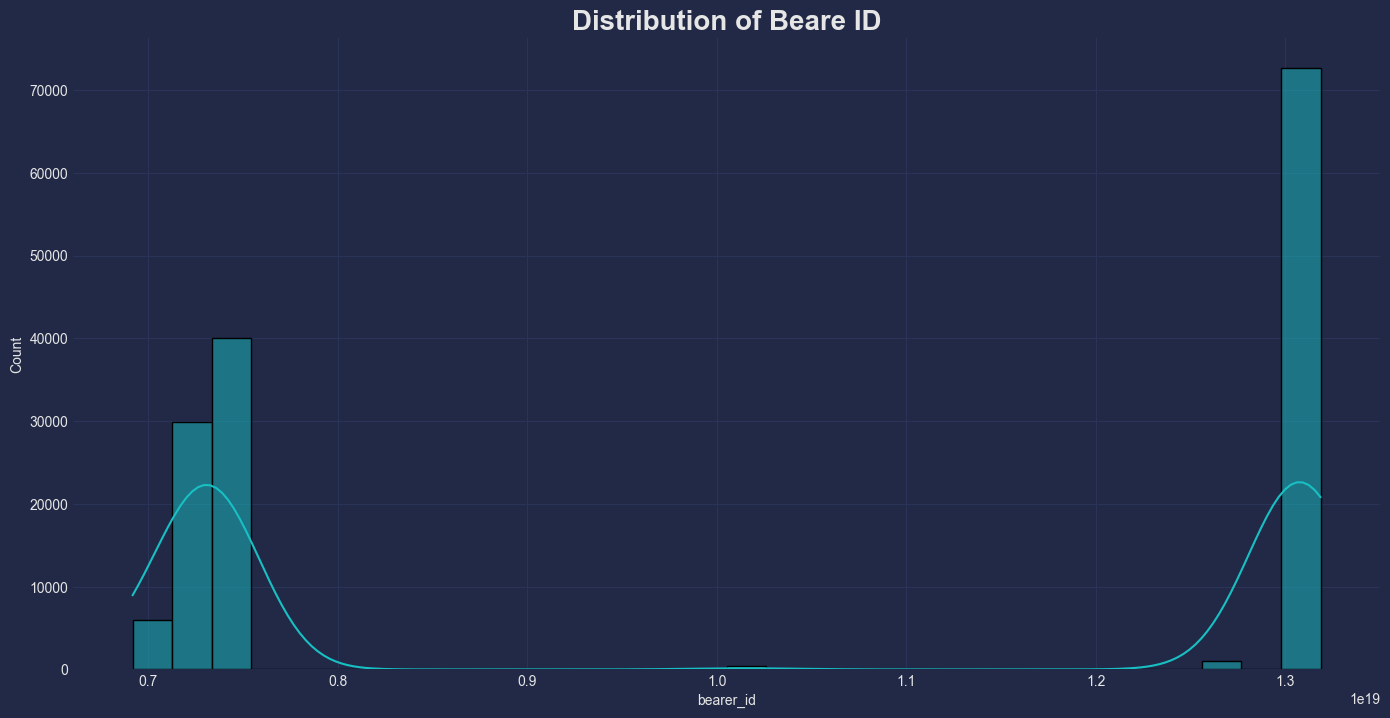

In [624]:
# Graphical Univariate analysis for beaer_id
pl.distplot(df_preprocessed, df_preprocessed['bearer_id'],'Beare ID')

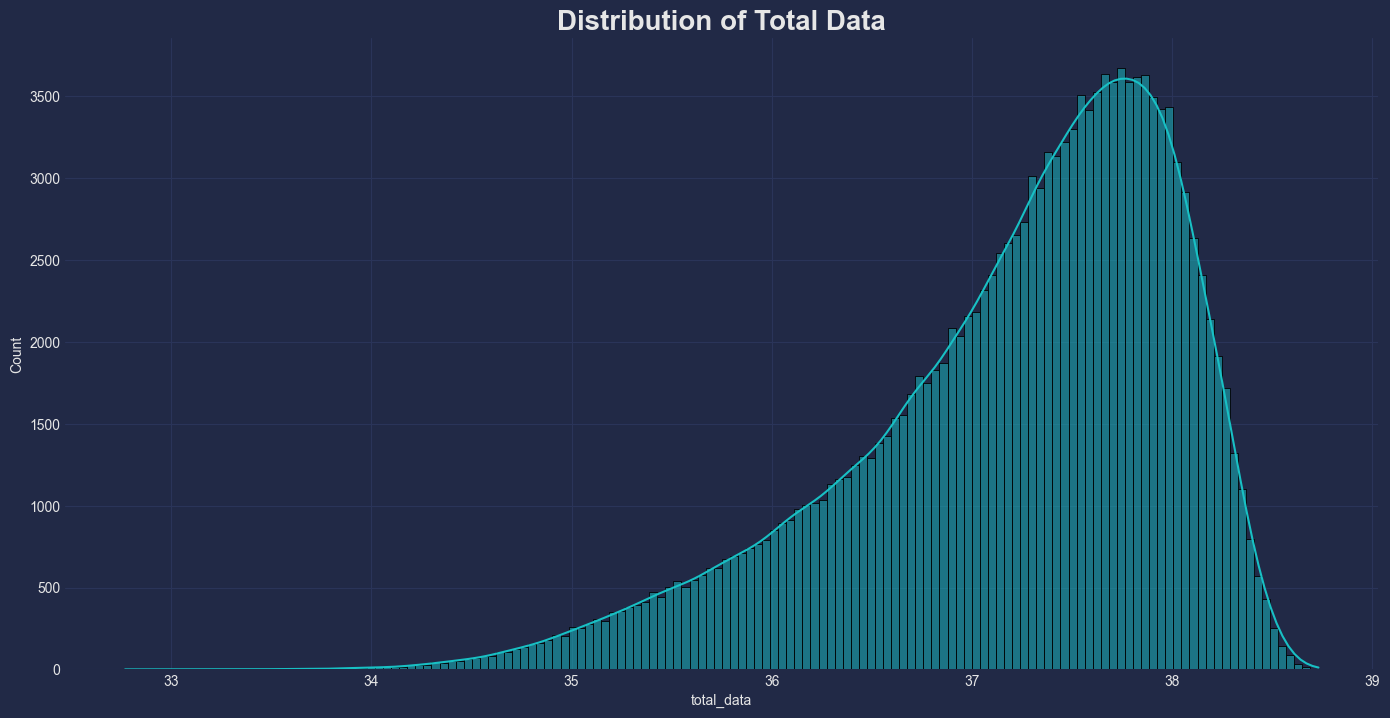

In [625]:
#distribution_plot(df_preprocessed,'total_data','Total Data')
pl.distplot(df_preprocessed, df_preprocessed['total_data'],'Total Data')

Negatively skewed distribution

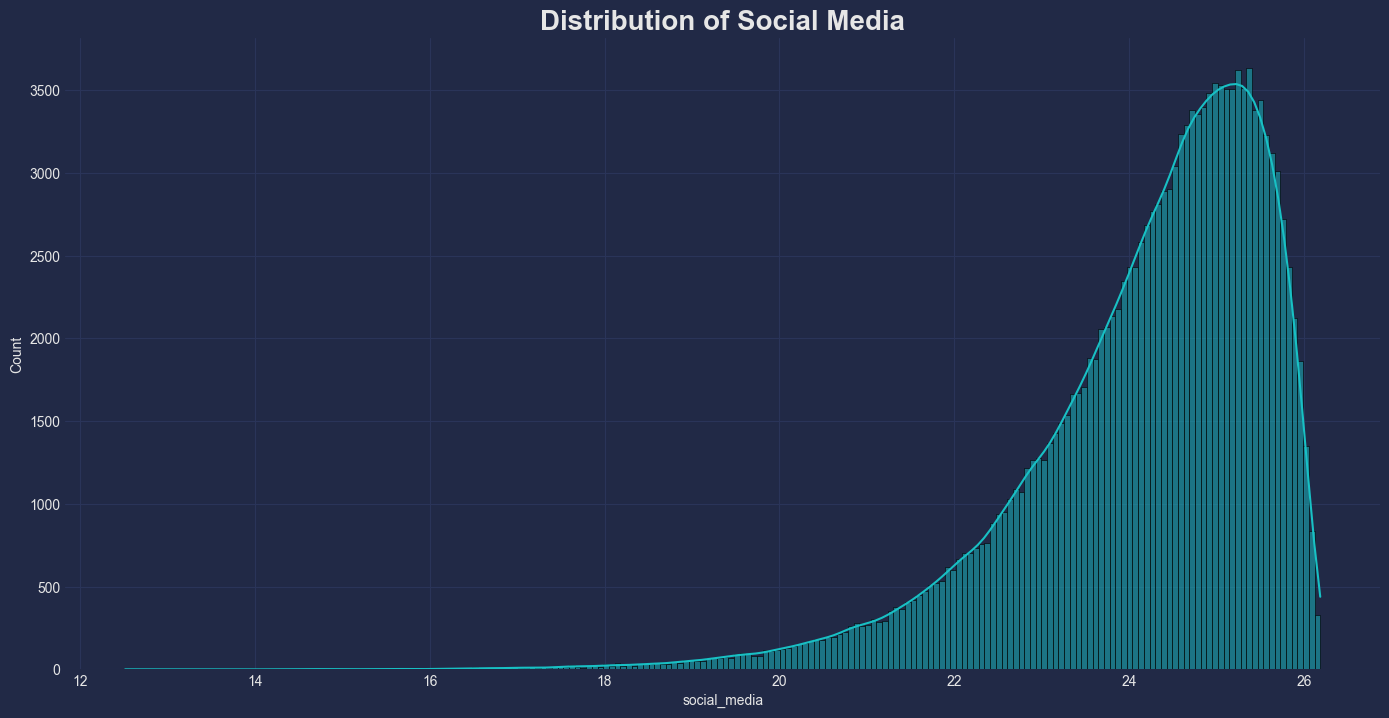

In [626]:
# Graphical Univariate analysis for Socail Media
pl.distplot(df_preprocessed,'social_media','Social Media')

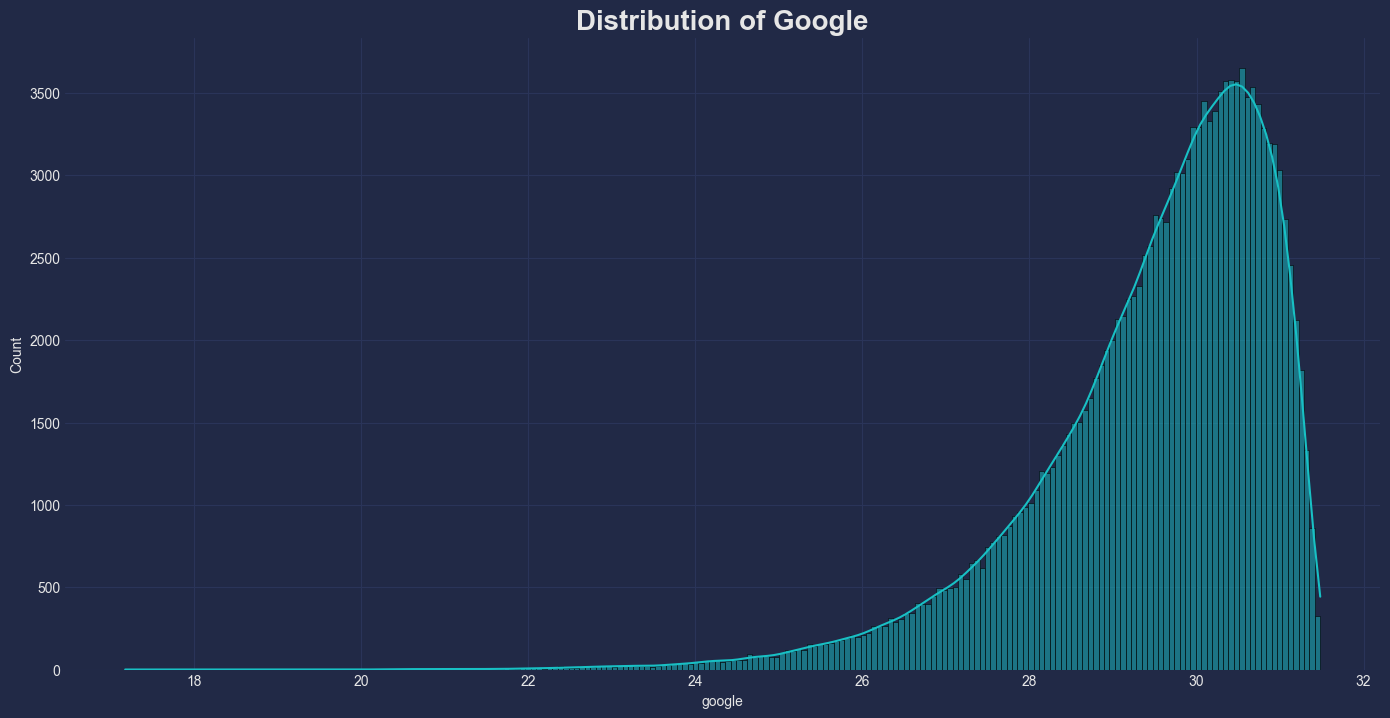

In [627]:
# Graphical Univariate analysis for Google
pl.distplot(df_preprocessed,'google','Google')

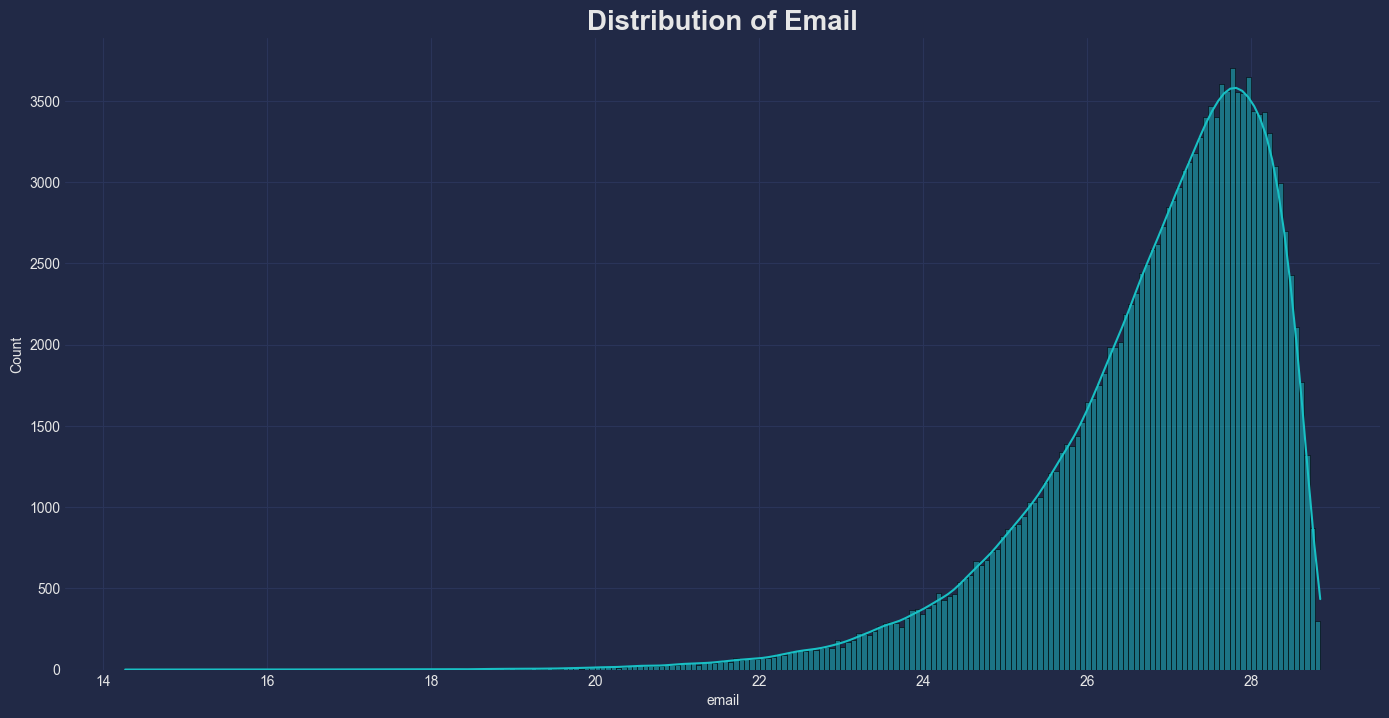

In [628]:
# Graphical Univariate analysis for Email
pl.distplot(df_preprocessed,'email','Email')

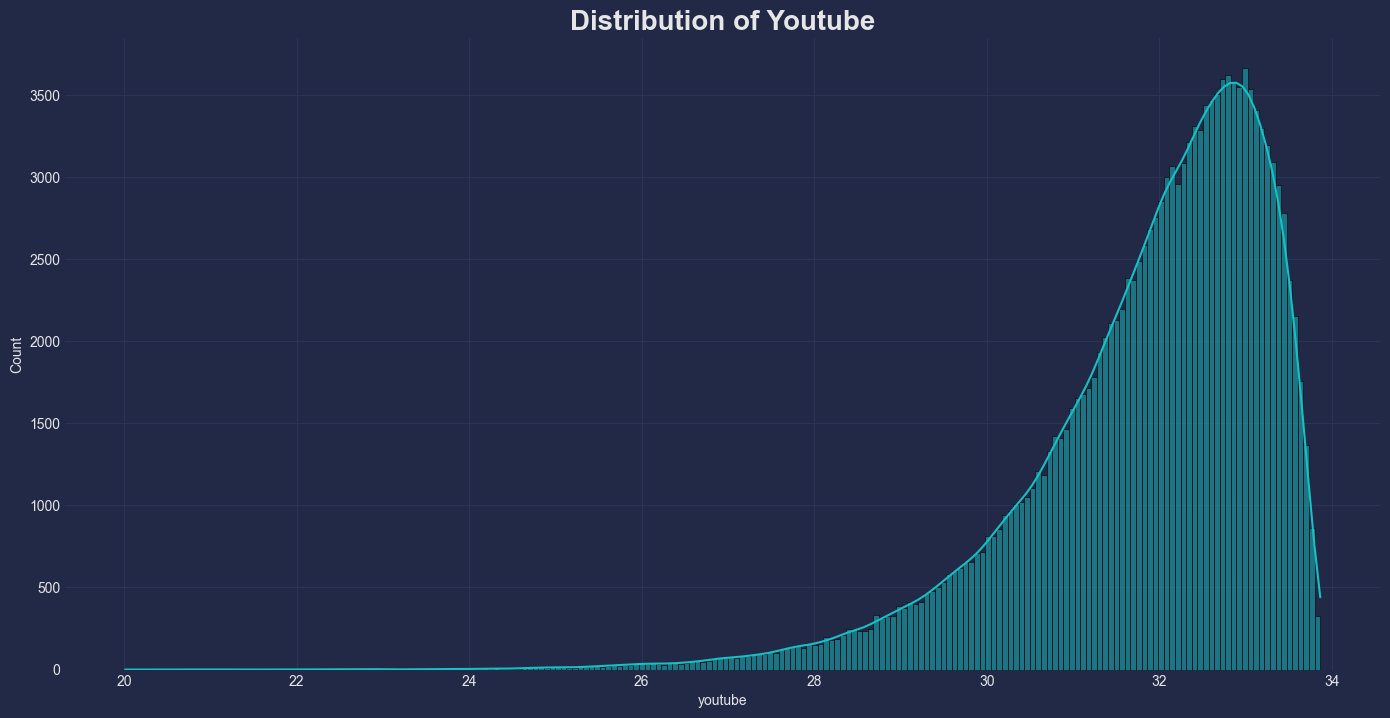

In [629]:
# Graphical Univariate analysis for Youtube
pl.distplot(df_preprocessed,'youtube','Youtube')

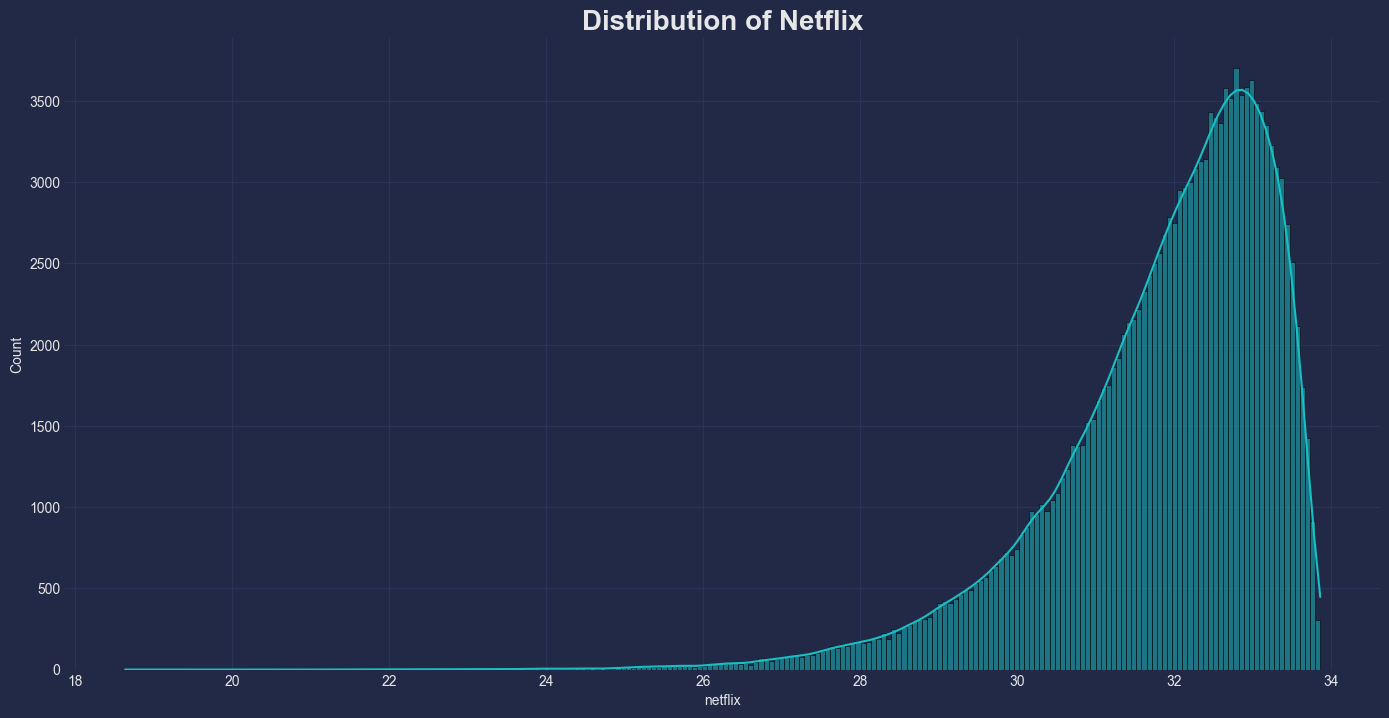

In [630]:
# Graphical Univariate analysis for Netflix
pl.distplot(df_preprocessed,'netflix','Netflix')

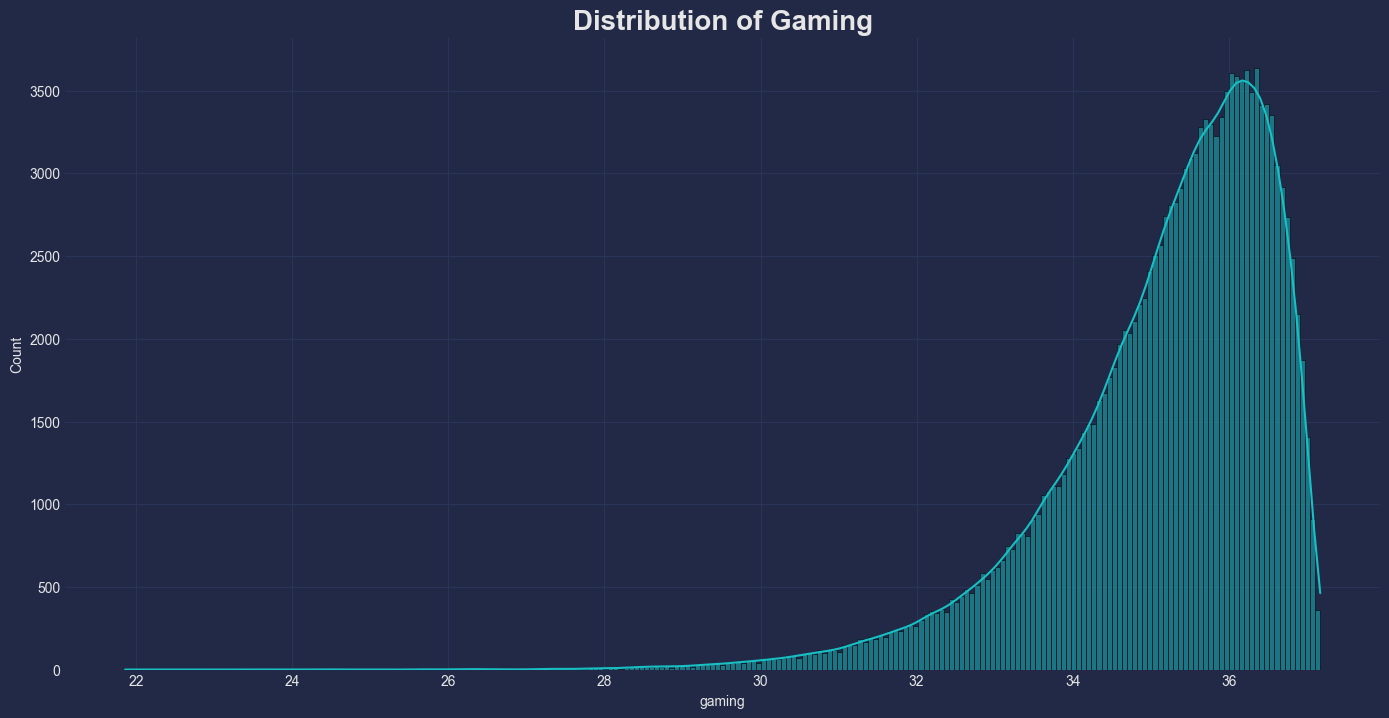

In [631]:
# Graphical Univariate analysis for Netflix
pl.distplot(df_preprocessed,'gaming','Gaming')

### Our observation here is that most of the social Media Data are negatively skewed

#### Bivariate Analysis

Multivariate Non-Graphical EDA

Cross-Tabulation

In [632]:
# Cross-Tabulation between last_location_name and handset_type
pd.crosstab(df_preprocessed.last_location_name[:1000], df_preprocessed.handset_type, margins=True)

handset_type           Apple iPad (A1954)  Apple iPad Mini 4 (A1550)  \
last_location_name                                                     
1.5327975494928E+017                    0                          0   
8.12221622307593E+016                   0                          0   
8.12221622307597E+016                   0                          0   
9.16456685854234E+015                   0                          0   
9.16456698470272E+015                   0                          0   
...                                   ...                        ...   
V93184C                                 0                          0   
W77618C                                 0                          0   
W78075A                                 0                          0   
W93934A                                 0                          0   
All                                     2                          1   

handset_type           Apple iPad Pro (A1652)  Apple iPad Pro 10.5 (A1709)  \
last_location_name                                                           
1.5327975494928E+017                        0                            0   
8.12221622307593E+016                       0                            0   
8.12221622307597E+016                       0                            0   
9.16456685854234E+015                       0                            0   
9.16456698470272E+015                       0                            0   
...                                       ...                          ...   
V93184C                                     0                            0   
W77618C                                     0                            0   
W78075A                                     0                            0   
W93934A                                     0                            0   
All                                         1                            1   

handset_type           Apple iPhone 4 (A1332)  Apple iPhone 4S (A1387)  \
last_location_name                                                       
1.5327975494928E+017                        0                        0   
8.12221622307593E+016                       0                        0   
8.12221622307597E+016                       0                        0   
9.16456685854234E+015                       0                        0   
9.16456698470272E+015                       0                        0   
...                                       ...                      ...   
V93184C                                     0                        1   
W77618C                                     0                        0   
W78075A                                     0                        0   
W93934A                                     0                        0   
All                                         4                        6   

handset_type           Apple iPhone 5 (A1429)  Apple iPhone 5C (A1507)  \
last_location_name                                                       
1.5327975494928E+017                        0                        0   
8.12221622307593E+016                       0                        0   
8.12221622307597E+016                       0                        0   
9.16456685854234E+015                       0                        0   
9.16456698470272E+015                       0                        0   
...                                       ...                      ...   
V93184C                                     0                        0   
W77618C                                     0                        0   
W78075A                                     0                        0   
W93934A                                     0                        0   
All                                         2                        1   

handset_type           Apple iPhone 5C (A1532)  Apple iPhone 5S (A1457)  ...  \
last_location_name                        

### Multivariate Graphical EDA

Scatter plot

In [633]:
def scatter_plot(df, x_column, y_column, title):    
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=df, x=x_column, y=y_column)
    plt.title(title, size=20)
    plt.show()

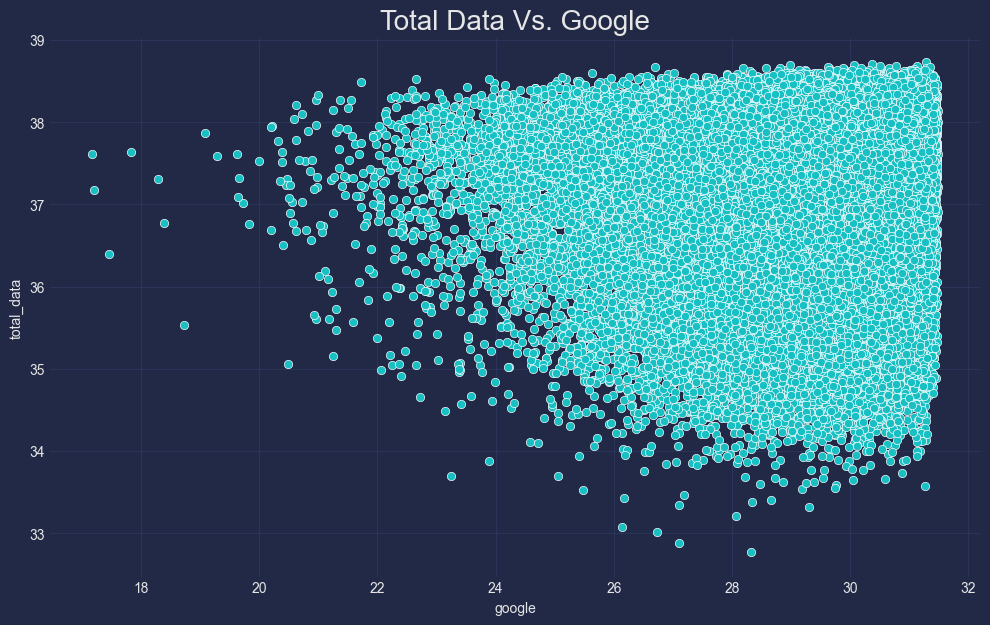

In [634]:
#  Scatter plot between total_data and google application
scatter_plot(df_preprocessed, df_preprocessed['google'], df_preprocessed['total_data'], 'Total Data Vs. Google')

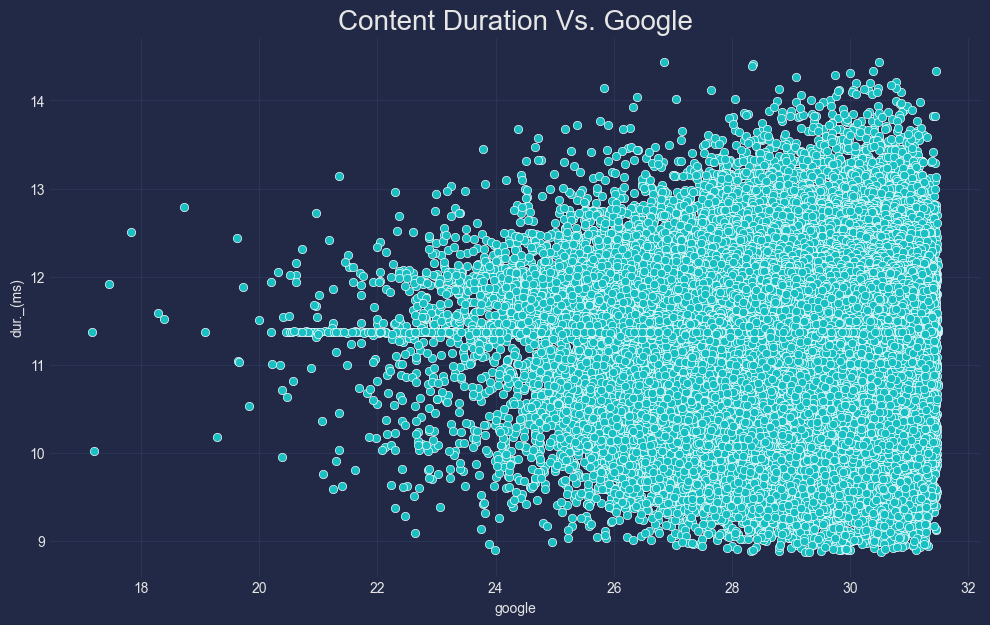

In [635]:
#  Scatter plot between XDR Duration and google application
scatter_plot(df_preprocessed, df_preprocessed['google'], df_preprocessed['dur._(ms)'], 'Content Duration Vs. Google')

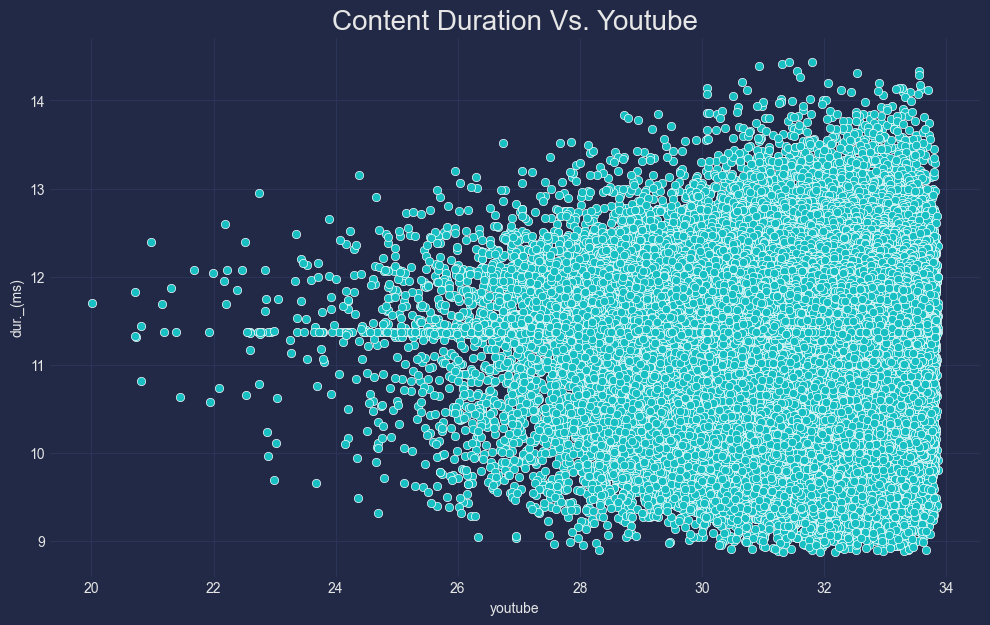

In [636]:
#  Scatter plot between  XDR Duration and youtube application
scatter_plot(df_preprocessed, df_preprocessed['youtube'], df_preprocessed['dur._(ms)'], 'Content Duration Vs. Youtube')

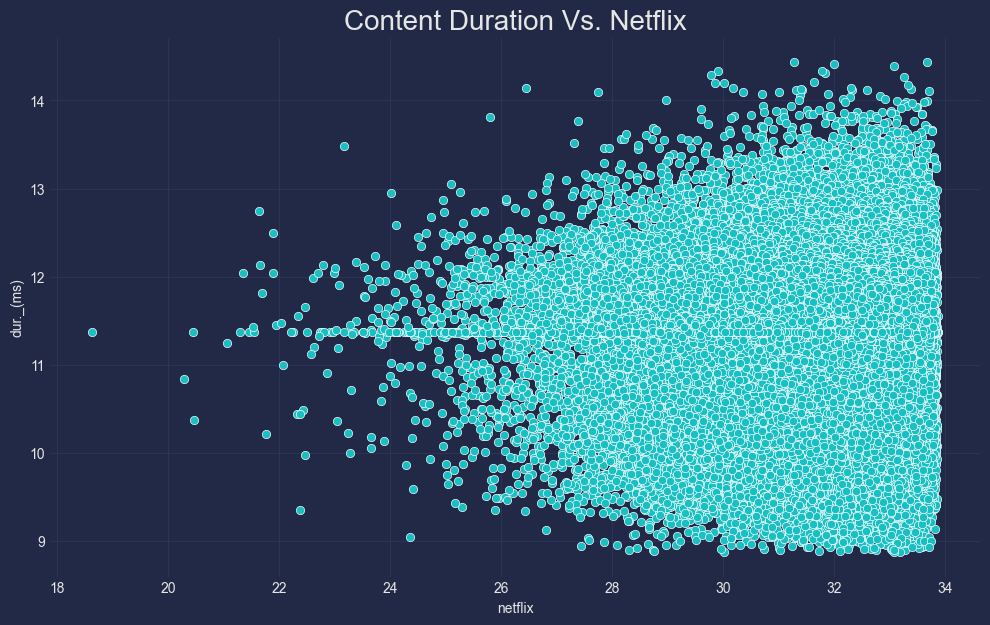

In [637]:
#  Scatter plot between XDR Duration and Netflix
scatter_plot(df_preprocessed, df_preprocessed['netflix'], df_preprocessed['dur._(ms)'], 'Content Duration Vs. Netflix')

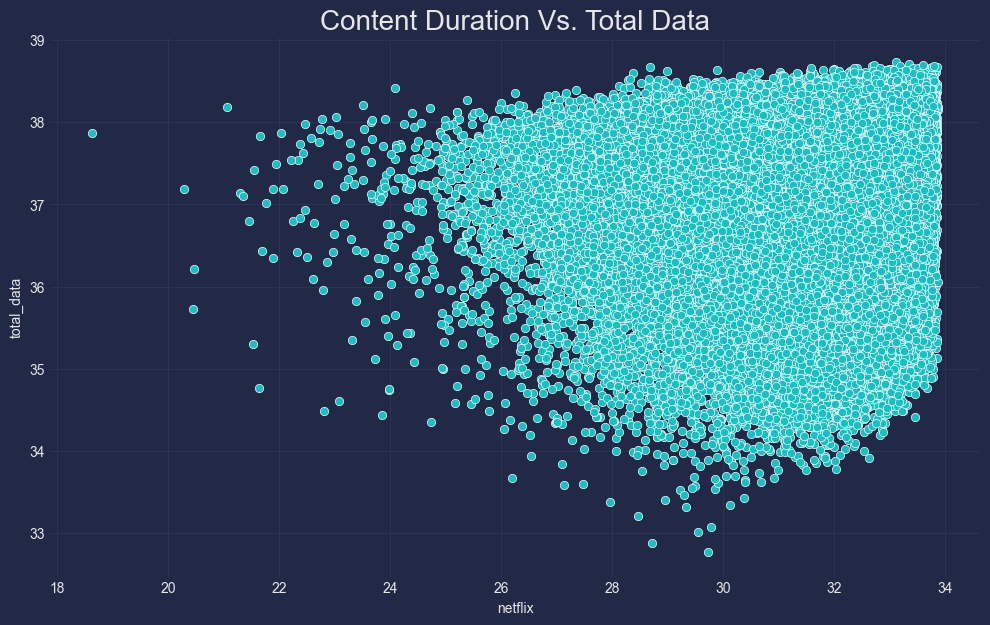

In [638]:
#  Scatter plot between total_data and netflix application
scatter_plot(df_preprocessed, df_preprocessed['netflix'], df_preprocessed['total_data'], 'Content Duration Vs. Total Data')

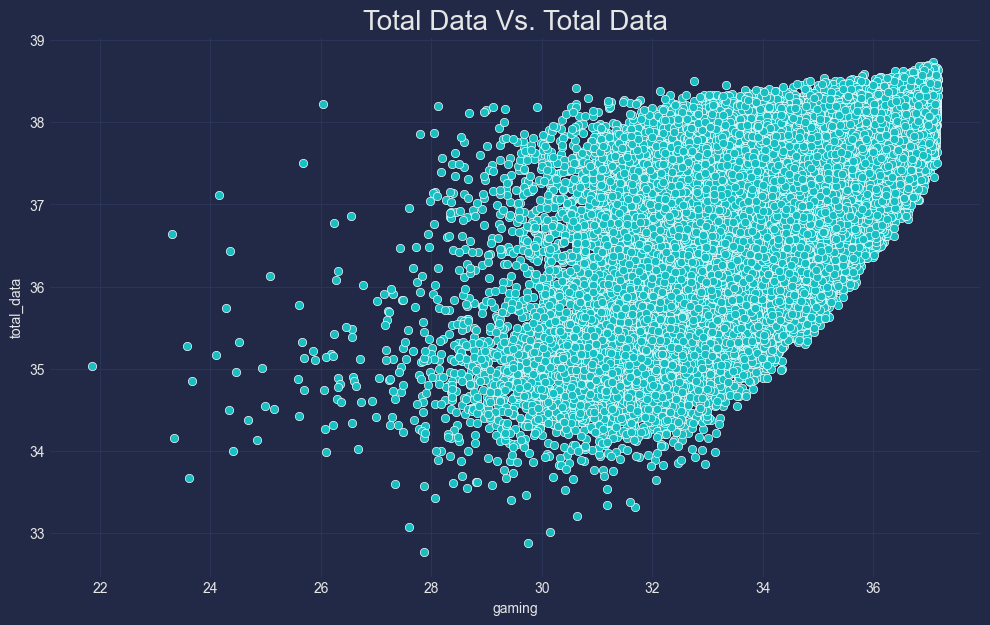

In [639]:
#  Scatter plot between total_data and netflix application
scatter_plot(df_preprocessed, df_preprocessed['gaming'], df_preprocessed['total_data'], 'Total Data Vs. Total Data')

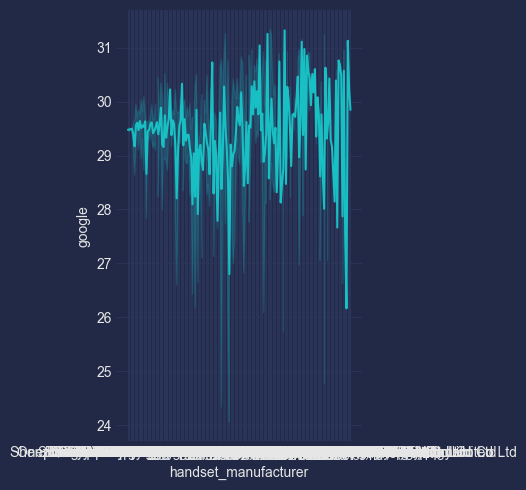

In [640]:
sns.relplot(data=df_preprocessed, x="handset_manufacturer", y="google", hue=None, kind="line")

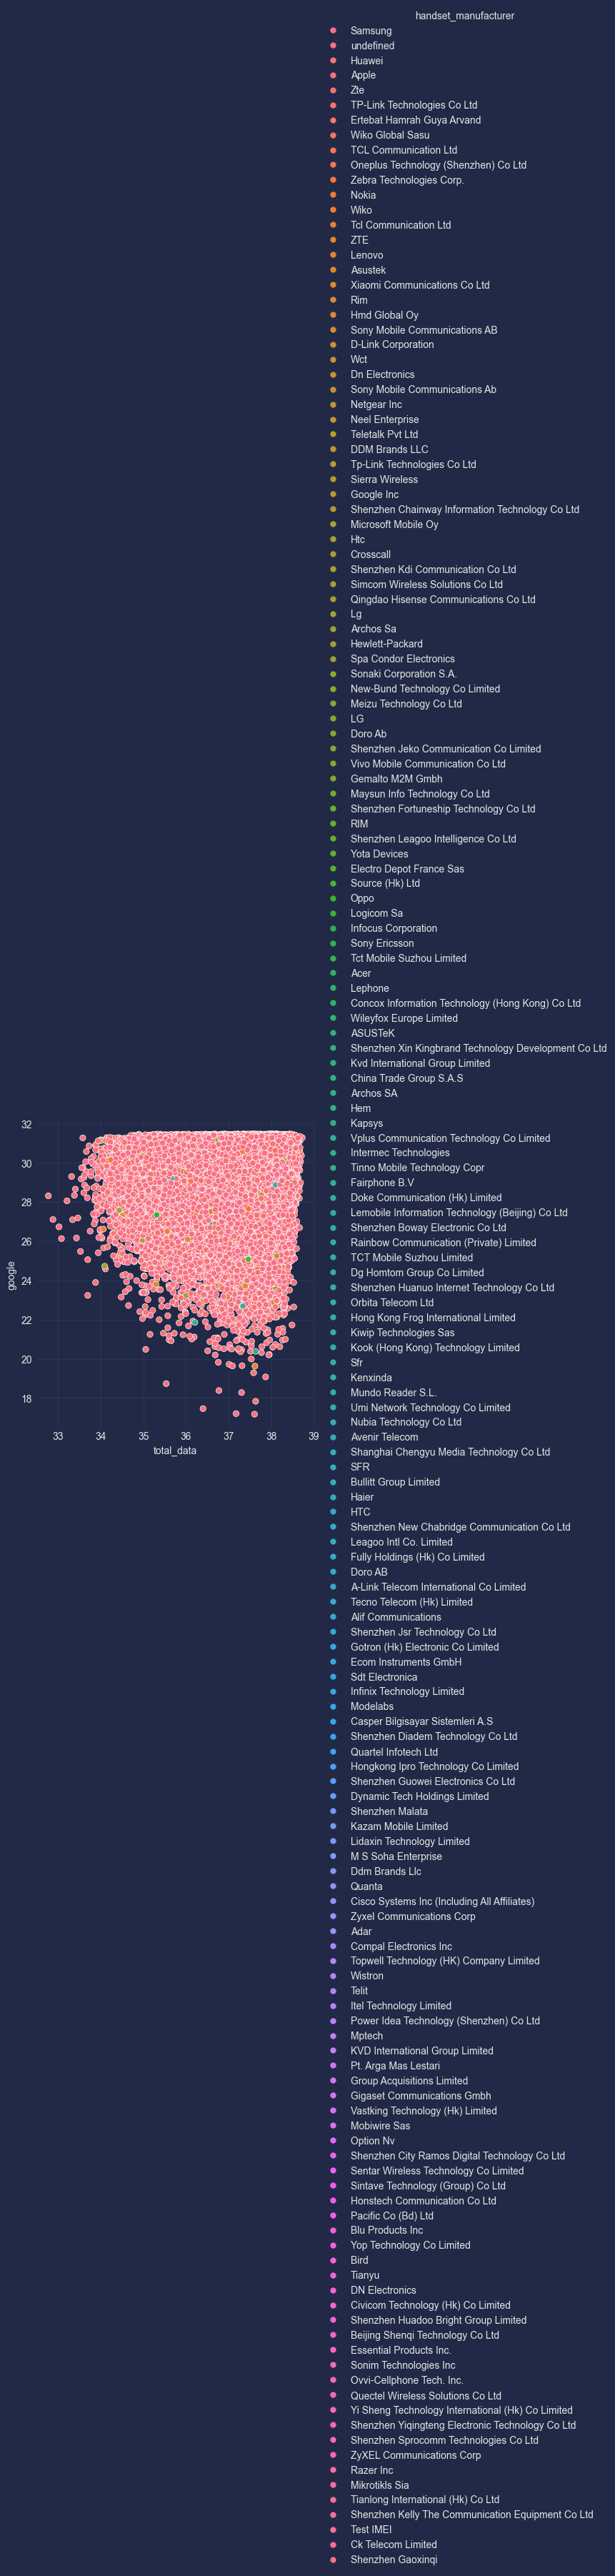

In [641]:
sns.relplot( data=df_preprocessed, x="total_data", y="google", hue="handset_manufacturer")

In [642]:
feature_to_use = df_preprocessed[['msisdn/number', 'google', 'email', 'youtube', 'netflix',
                                 'gaming',  'other', 'total_data', 'handset_manufacturer']]

In [643]:
count = feature_to_use.sum()
count

msisdn/number                                          6273713008827741.0
google                                                     4423126.907924
email                                                      4025847.934201
youtube                                                    4780686.122606
netflix                                                    4779974.051194
gaming                                                     5276432.802108
other                                                        5275429.6317
total_data                                                 5580871.457065
handset_manufacturer    SamsungSamsungSamsungundefinedSamsungundefined...
dtype: object

In [644]:
total_count_app = pd.DataFrame({'app':count.index[1:-1], 'total':count.values[1:-1]})
total_count_app

app           total
0      google  4423126.907924
1       email  4025847.934201
2     youtube  4780686.122606
3     netflix  4779974.051194
4      gaming  5276432.802108
5       other    5275429.6317
6  total_data  5580871.457065

In [645]:
total_count_app.sort_values(by='total', ascending=False)

app           total
6  total_data  5580871.457065
4      gaming  5276432.802108
5       other    5275429.6317
2     youtube  4780686.122606
3     netflix  4779974.051194
0      google  4423126.907924
1       email  4025847.934201

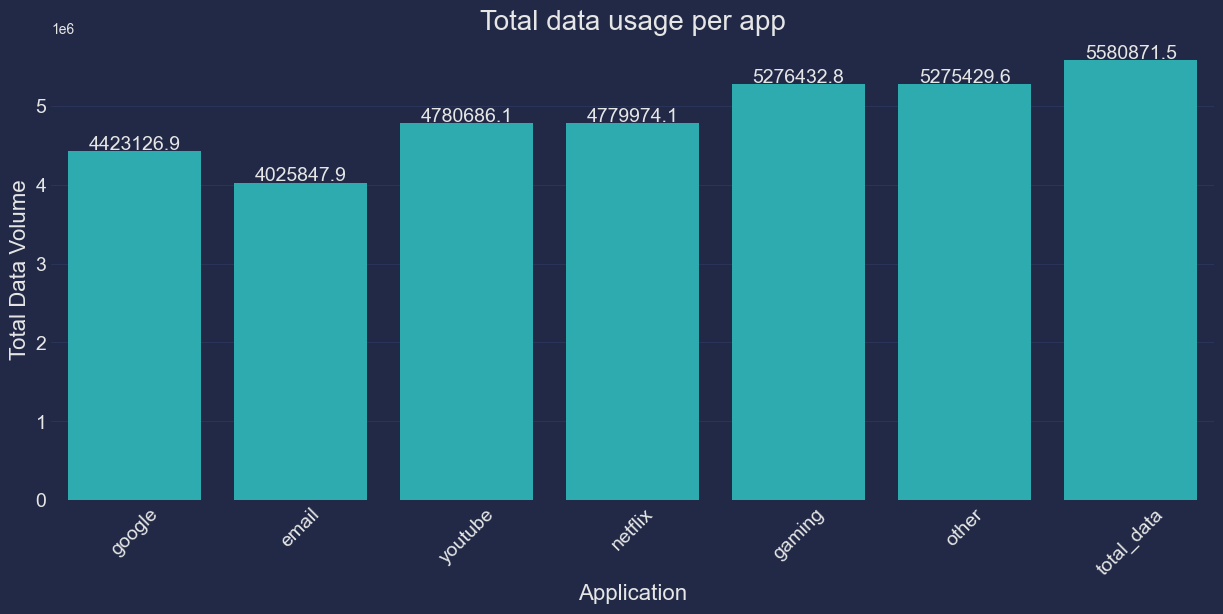

In [646]:
pl.barplot(total_count_app,'app', 'total', 'Total data usage per app','Application','Total Data Volume' )


#### Variable transformations

In [647]:
var_tr = df_preprocessed[['msisdn/number', 'dur._(ms)', 'total_data']]

In [648]:
var_tr.head()

msisdn/number  dur._(ms)  total_data
0   3.366496e+10  14.416352   36.968104
1   3.368185e+10  14.126741   38.098468
2   3.376063e+10  14.124290   36.593162
3   3.375034e+10  14.094285   38.140286
4   3.369980e+10  13.900779   37.626915

In [649]:
var_tr_agg = var_tr.groupby('msisdn/number').agg({'dur._(ms)':'sum', 'total_data': 'sum'})

In [650]:
var_tr_agg.shape

(107900, 2)

In [651]:
var_tr_agg['deciles'] = pd.qcut(var_tr_agg['dur._(ms)'], 5, labels=['First Decile', 'Second Decile', 'Third Decile', 'Fourth Decile', 'Fifth Decile'])

In [652]:
var_tr_agg.head()

dur._(ms)  total_data        deciles
msisdn/number                                      
3.360100e+10   11.667533   37.952551   Third Decile
3.360100e+10   12.107522   36.011203  Fourth Decile
3.360100e+10   11.812800   37.624373   Third Decile
3.360101e+10   10.817335   36.639432   First Decile
3.360101e+10   19.656666   75.943057  Fourth Decile

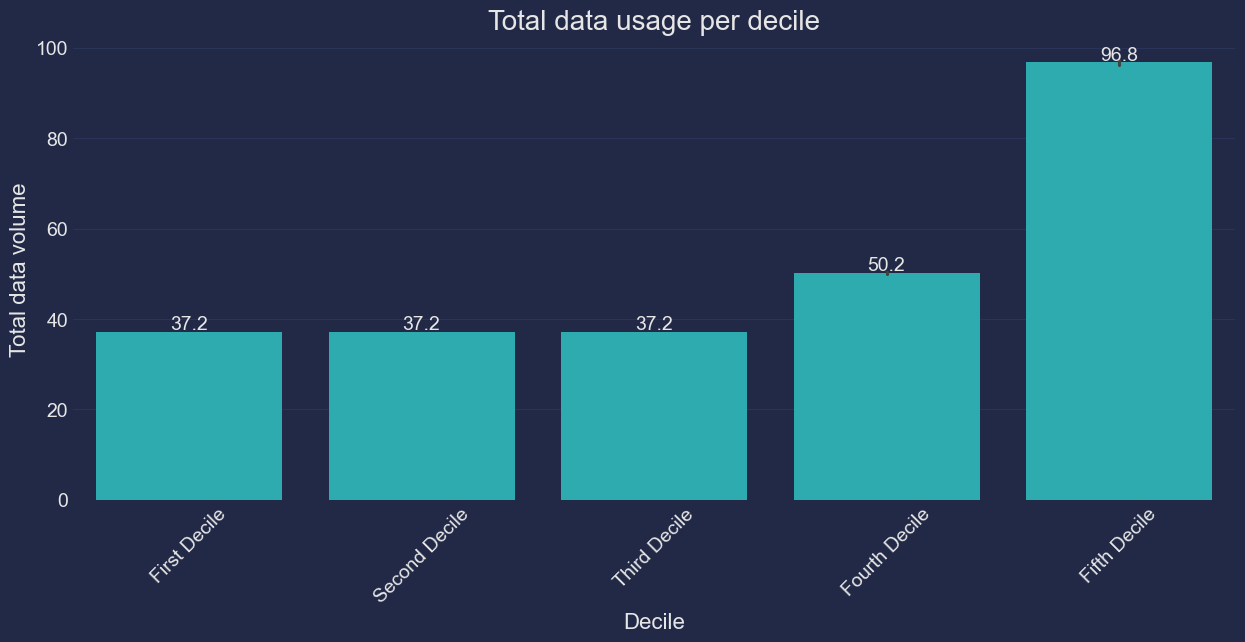

In [653]:
data_d = var_tr_agg.sort_values(by=['total_data'], ascending=False)
pl.barplot(data_d, 'deciles', 'total_data', 'Total data usage per decile','Decile','Total data volume' )

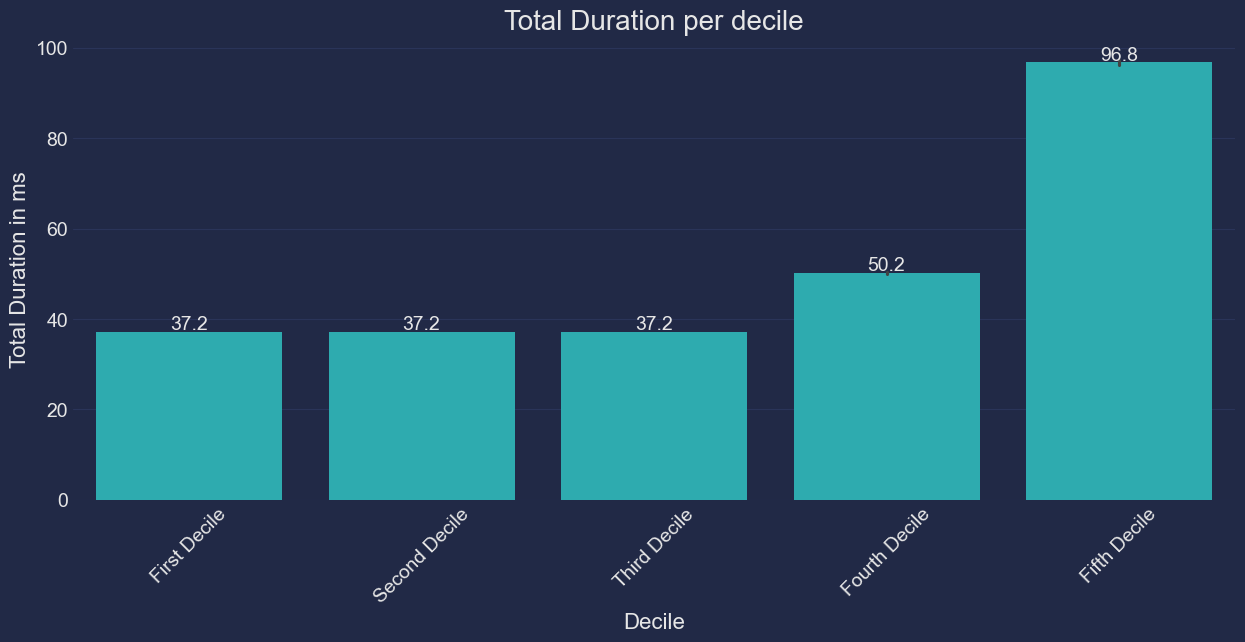

In [654]:
data_du = var_tr_agg.sort_values(by=['total_data'], ascending=False)
pl.barplot(data_d, 'deciles', 'total_data', 'Total Duration per decile','Decile','Total Duration in ms' )

#### Correlation Analysis

In [655]:
corr_analysis = df_preprocessed[['msisdn/number','social_media', 'google',
                    'email', 'youtube', 'netflix', 'gaming', 'other']]

In [656]:
# Aggregate social app data by msisdn/number
corr_analysis_agg = corr_analysis.groupby('msisdn/number').agg({'social_media':'sum', 'google':'sum', 'email':'sum', 'youtube':'sum', 'netflix':'sum', 'gaming':'sum', 'other':'sum'})

In [657]:
corr_analysis_agg

social_media     google      email    youtube    netflix  \
msisdn/number                                                             
3.360100e+10      24.758478  28.886711  26.748271  32.238131  32.788024   
3.360100e+10      25.805627  29.194096  27.934743  31.264510  29.717111   
3.360100e+10      25.733266  26.531873  28.258763  31.345269  31.475514   
3.360101e+10      22.704073  30.731634  26.165886  30.060477  27.534749   
3.360101e+10      48.636766  60.823188  53.460940  63.649461  64.349061   
...                     ...        ...        ...        ...        ...   
3.379000e+10      23.459775  29.192118  26.256508  32.656413  28.410670   
3.379000e+10      23.938975  29.393481  21.235442  32.010315  30.037566   
3.197021e+12      24.162892  30.403346  27.071495  30.668889  32.755307   
3.370000e+14      23.250760  30.216433  27.614238  33.443815  32.972744   
8.823971e+14      24.956229  30.593875  28.347076  33.663664  32.682234   

                  gaming      other  
msisdn/number                        
3.360100e+10   34.642406  35.812062  
3.360100e+10   34.974170  34.030799  
3.360100e+10   36.180352  35.723909  
3.360101e+10   34.707784  33.165518  
3.360101e+10   70.313658  71.318676  
...                  ...        ...  
3.379000e+10   35.229296  34.664492  
3.379000e+10   35.928164  34.820827  
3.197021e+12   35.335906  34.825549  
3.370000e+14   36.032357  34.179043  
8.823971e+14   33.673097  36.096507  

[107900 rows x 7 columns]

In [658]:
corr_apps = corr_analysis_agg.corr()

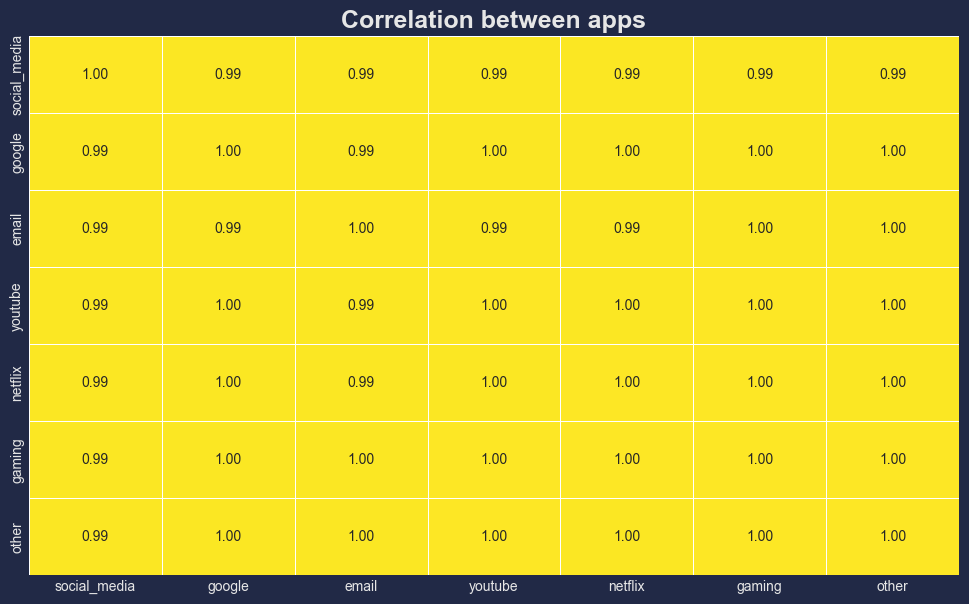

In [659]:
# corr_analysis_agg.corr()
pl.plot_heatmap(corr_apps,"Correlation between apps")

### Dimensionality Reduction using PCA

In [660]:
# Non-Graphical Univariate analysis for the categorical variables
num_cols = df_preprocessed.select_dtypes(include=np.number).columns
cat_cols = list(set(df_preprocessed.columns) - set(num_cols))

In [661]:
df_preprocessed[num_cols].columns

Index(['bearer_id', 'start_ms', 'end_ms', 'dur._(ms)', 'imsi', 'msisdn/number',
       'imei', 'avg_rtt_dl_(ms)', 'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)',
       'avg_bearer_tp_ul_(kbps)', 'tcp_dl_retrans._vol_(bytes)',
       'tcp_ul_retrans._vol_(bytes)', 'dl_tp_<_50_kbps_(%)',
       '50_kbps_<_dl_tp_<_250_kbps_(%)', '250_kbps_<_dl_tp_<_1_mbps_(%)',
       'dl_tp_>_1_mbps_(%)', 'ul_tp_<_10_kbps_(%)',
       '10_kbps_<_ul_tp_<_50_kbps_(%)', '50_kbps_<_ul_tp_<_300_kbps_(%)',
       'ul_tp_>_300_kbps_(%)', 'http_dl_(bytes)', 'http_ul_(bytes)',
       'activity_duration_dl_(ms)', 'activity_duration_ul_(ms)', 'dur._(ms).1',
       'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
       'nb_of_sec_with_vol_dl_<_6250b', 'nb_of_sec_with_vol_ul_<_1250b',
       'soci

In [662]:
num_final = [col for col in num_cols if col not in ['msisdn/number','bearer_id', 'start_ms', 'end_ms', 'imsi', 'imei']]

In [663]:
num_final

['dur._(ms)',
 'avg_rtt_dl_(ms)',
 'avg_rtt_ul_(ms)',
 'avg_bearer_tp_dl_(kbps)',
 'avg_bearer_tp_ul_(kbps)',
 'tcp_dl_retrans._vol_(bytes)',
 'tcp_ul_retrans._vol_(bytes)',
 'dl_tp_<_50_kbps_(%)',
 '50_kbps_<_dl_tp_<_250_kbps_(%)',
 '250_kbps_<_dl_tp_<_1_mbps_(%)',
 'dl_tp_>_1_mbps_(%)',
 'ul_tp_<_10_kbps_(%)',
 '10_kbps_<_ul_tp_<_50_kbps_(%)',
 '50_kbps_<_ul_tp_<_300_kbps_(%)',
 'ul_tp_>_300_kbps_(%)',
 'http_dl_(bytes)',
 'http_ul_(bytes)',
 'activity_duration_dl_(ms)',
 'activity_duration_ul_(ms)',
 'dur._(ms).1',
 'nb_of_sec_with_125000b_<_vol_dl',
 'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
 'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
 'nb_of_sec_with_37500b_<_vol_ul',
 'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
 'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
 'nb_of_sec_with_vol_dl_<_6250b',
 'nb_of_sec_with_vol_ul_<_1250b',
 'social_media_dl_(bytes)',
 'social_media_ul_(bytes)',
 'google_dl_(bytes)',
 'google_ul_(bytes)',
 'email_dl_(bytes)',
 'email_ul_(bytes)',
 'youtube_dl_(bytes)',

In [681]:
len(df_preprocessed.columns)

63

#### Standardize features

In [665]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df = df.replace([[np.nan, np.inf, -np.inf]],np.nan)
    df.dropna(inplace=True)
    df = df.fillna(df.mean())
    #indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any()
    #df = df.loc[:,indices_to_keep] 
    return df.astype(np.float64)


In [666]:
df_standard = df_preprocessed.copy()

In [667]:
df_standard = clean_dataset(df_standard[num_final])

In [668]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_standard)
df_scaled = scaler.transform(df_standard)

In [682]:
df_scaled.shape 

(991, 52)

In [670]:
from sklearn.decomposition import PCA
pca_50 = PCA(n_components=50, random_state=42)
pca_50.fit(df_scaled)

PCA(n_components=50, random_state=42)

In [671]:
x_pca_50 = pca_50.transform(df_scaled)

In [672]:
x_pca_50.shape

(991, 50)

In [673]:
sum(pca_50.explained_variance_ratio_)

1.0

In [674]:
np.cumsum(pca_50.explained_variance_ratio_ * 100)


array([ 25.1586266 ,  32.28146078,  37.42955946,  42.17082074,
        46.75529257,  50.94253249,  54.94204982,  58.89238095,
        62.79326836,  66.24485544,  69.42571751,  72.29068788,
        75.03222709,  77.48422996,  79.65149499,  81.75944164,
        83.7798235 ,  85.73776766,  87.59255922,  89.4267359 ,
        91.20574929,  92.71600401,  94.02230051,  95.0213996 ,
        95.94693371,  96.70312317,  97.31936095,  97.93097725,
        98.50893657,  98.96203848,  99.3581542 ,  99.65091798,
        99.79105184,  99.85906653,  99.92266688,  99.95924505,
        99.97412819,  99.98206381,  99.98814694,  99.99220024,
        99.99573262,  99.99862628, 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        ])

Text(0, 0.5, 'Cumulative Explained Variance')

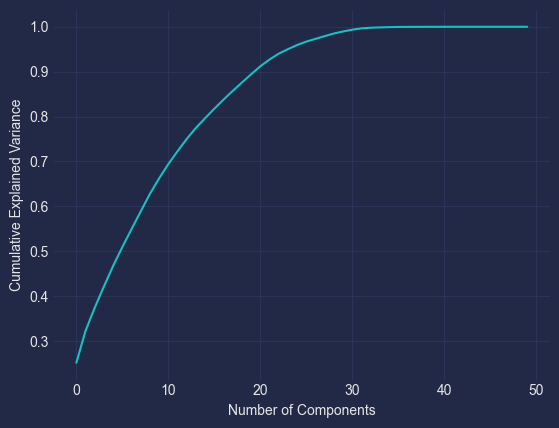

In [675]:
plt.plot(np.cumsum(pca_50.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')


In [676]:
print("Variance explained by first Principal components: {}".format( np.cumsum(pca_50.explained_variance_ratio_ * 100)[0]))
print("Variance explained by  2 Principal components: {}".format( np.cumsum(pca_50.explained_variance_ratio_ * 100)[1]))
print("Variance explained by  3 Principal components: {}".format( np.cumsum(pca_50.explained_variance_ratio_ * 100)[2]))
print("Variance explained by  10 Principal components: {}".format( np.cumsum(pca_50.explained_variance_ratio_ * 100)[9]))

Variance explained by first Principal components: 25.158626599136362
Variance explained by  2 Principal components: 32.28146077655484
Variance explained by  3 Principal components: 37.429559464467765
Variance explained by  10 Principal components: 66.2448554396887


In [677]:
#  Apply PCA by setting n_components=0.65
pca_65 = PCA(n_components=0.65, random_state=42)
pca_65.fit(df_scaled)
df_pca_95 = pca_65.transform(df_scaled)

In [678]:
pca_data = pd.DataFrame(df_pca_95)
pca_data.head()

0         1         2         3         4         5         6  \
0 -2.225406 -2.830396 -2.281482  0.362313  1.020447  2.045941 -0.675477   
1 -1.990566  2.265299 -0.715029  1.653986  0.536876 -1.896268  0.030380   
2 -4.548948  2.976862  0.874852  1.236712 -0.451675  1.274089  1.833536   
3 -3.479618  3.448095  1.292125 -1.051999 -2.882133 -0.775572 -1.844860   
4  0.571158 -0.990837 -0.909436 -0.683079  2.341970 -1.289378 -0.245329   

          7         8         9  
0  0.152708 -1.309287  2.787448  
1  1.070196 -0.710045 -0.138167  
2  0.661096 -1.317549 -0.268399  
3 -0.681687  0.940473  0.711882  
4 -1.887382  0.379261  1.404347

The features have now been reduced to 90 dimensions

In [679]:
pca_data.to_csv('../data/cleaned_data2.csv', index=False)